## US Senators - Extract Data

In [2]:
from bs4 import BeautifulSoup

In [3]:
import requests

In [187]:
url = 'https://en.wikipedia.org/wiki/List_of_current_United_States_senators'

In [188]:
r = requests.get(url)

In [189]:
html = r.text

In [190]:
soup = BeautifulSoup(html)

In [191]:
# find the "List of senators" heading

In [192]:
table = soup.find('table', {'id': 'senators'})

In [193]:
table

<table class="wikitable sortable" id="senators" style="text-align:center">
<tbody><tr>
<th>State
</th>
<th>Image
</th>
<th>Senator
</th>
<th colspan="2">Party
</th>
<th>Born
</th>
<th>Occupation(s)
</th>
<th>Previous<br/>office(s)
</th>
<th>Assumed office
</th>
<th><span class="nowrap">Term up</span>
</th>
<th>Residence
</th></tr>
<tr>
<td rowspan="2"><a href="/wiki/List_of_United_States_senators_from_Alabama" title="List of United States senators from Alabama">Alabama</a>
</td>
<td><a class="image" href="/wiki/File:Richard_Shelby,_official_portrait,_112th_Congress_(cropped).jpg"><img alt="Richard Shelby, official portrait, 112th Congress (cropped).jpg" data-file-height="1536" data-file-width="1103" decoding="async" height="132" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Richard_Shelby%2C_official_portrait%2C_112th_Congress_%28cropped%29.jpg/95px-Richard_Shelby%2C_official_portrait%2C_112th_Congress_%28cropped%29.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb

In [194]:
# extract schema
# the markup isn't done in a semantic-web way
# so have to get creative

cols = []

for col in table.find('tr').findAll('th'):
    if 'colspan' in col.attrs:
        n = int(col.attrs['colspan'])
        for i in range(n):
            cols.append(f'{col.text.strip()} - {i + 1}')
    else:
        cols.append(col.text.strip())
    
    
cols

['State',
 'Image',
 'Senator',
 'Party - 1',
 'Party - 2',
 'Born',
 'Occupation(s)',
 'Previousoffice(s)',
 'Assumed office',
 'Term up',
 'Residence']

In [195]:
cols

['State',
 'Image',
 'Senator',
 'Party - 1',
 'Party - 2',
 'Born',
 'Occupation(s)',
 'Previousoffice(s)',
 'Assumed office',
 'Term up',
 'Residence']

In [196]:
rows = []

next_row = {}

for i, row in enumerate(table.find('tbody').find_all('tr', recursive=False)):
    d = next_row
    next_row = {}
    
    if i == 0:
        # skip first row - that's the header row
        continue
        
    cols_to_search = cols[:]
    for key in d:
        cols_to_search.remove(key)
        
    
    for col, key in zip(row.find_all(['td', 'th'], recursive=False), cols_to_search):
        d[key] = col.text.replace('&nbsp;', ' ').replace('\xa0', ' ').strip()
        if 'rowspan' in col.attrs and int(col.attrs['rowspan']) == 2:
#             print('found rowspan')
            next_row[key] = d[key]
        
    rows.append(d)
    
# rows

In [197]:
rows

[{'State': 'Alabama',
  'Image': '',
  'Senator': 'Richard Shelby',
  'Party - 1': '',
  'Party - 2': 'Republican',
  'Born': '(1934-05-06) May 6, 1934 (age 86)',
  'Occupation(s)': 'Lawyer',
  'Previousoffice(s)': 'U.S. HouseAlabama Senate',
  'Assumed office': 'January 3, 1987',
  'Term up': '2022',
  'Residence': 'Tuscaloosa[1]'},
 {'State': 'Alabama',
  'Image': '',
  'Senator': 'Doug Jones',
  'Party - 1': '',
  'Party - 2': 'Democratic',
  'Born': '(1954-05-04) May 4, 1954 (age 66)',
  'Occupation(s)': 'Lawyer',
  'Previousoffice(s)': 'Staff counsel, U.S. Senate Judiciary CommitteeU.S. Attorney for the Northern District of Alabama',
  'Assumed office': 'January 3, 2018[d]',
  'Term up': '2020',
  'Residence': 'Birmingham[1]'},
 {'State': 'Alaska',
  'Image': '',
  'Senator': 'Lisa Murkowski',
  'Party - 1': '',
  'Party - 2': 'Republican',
  'Born': '(1957-05-22) May 22, 1957 (age 62)',
  'Occupation(s)': 'Lawyer',
  'Previousoffice(s)': 'Alaska House of Representatives',
  'Assu

In [198]:
import pandas as pd

In [199]:
df = pd.DataFrame(rows)

In [200]:
df

,State,Image,Senator,Party - 1,Party - 2,Born,Occupation(s),Previousoffice(s),Assumed office,Term up,Residence
0,Alabama,,Richard Shelby,,Republican,"(1934-05-06) May 6, 1934 (age 86)",Lawyer,U.S. HouseAlabama Senate,"January 3, 1987",2022,Tuscaloosa[1]
1,Alabama,,Doug Jones,,Democratic,"(1954-05-04) May 4, 1954 (age 66)",Lawyer,"Staff counsel, U.S. Senate Judiciary Committee...","January 3, 2018[d]",2020,Birmingham[1]
2,Alaska,,Lisa Murkowski,,Republican,"(1957-05-22) May 22, 1957 (age 62)",Lawyer,Alaska House of Representatives,"December 20, 2002",2022,Anchorage[3]
3,Alaska,,Dan Sullivan,,Republican,"(1964-11-13) November 13, 1964 (age 55)",U.S. Marine Corps officerLawyer,Alaska Attorney GeneralAssistant Secretary of ...,"January 3, 2015",2020,Anchorage[3]
4,Arizona,,Kyrsten Sinema,,Democratic,"(1976-07-12) July 12, 1976 (age 43)",Social workerPolitical activistLawyerCollege p...,U.S. HouseArizona SenateArizona House of Repre...,"January 3, 2019",2024,Phoenix[4]
...,...,...,...,...,...,...,...,...,...,...,...
95,West Virginia,,Shelley Moore Capito,,Republican,"(1953-11-26) November 26, 1953 (age 66)","College career counselorDirector, state Board ...",U.S. HouseWest Virginia House of Delegates,"January 3, 2015",2020,Charleston
96,Wisconsin,,Ron Johnson,,Republican,"(1955-04-08) April 8, 1955 (age 65)",AccountantCorporate executive,None,"January 3, 2011",2022,Oshkosh
97,Wisconsin,,Tammy Baldwin,,Democratic,"(1962-02-11) February 11, 1962 (age 58)",Lawyer,"U.S. HouseWisconsin AssemblyDane County, Wisco...","January 3, 2013",2024,Madison
98,Wyoming,,Mike Enzi,,Republican,"(1944-02-01) February 1, 1944 (age 76)",Nonprofit organization executiveAccountantCEOM...,Wyoming House of RepresentativesWyoming Senate,"January 3, 1997",2020,Gillette


In [201]:
df['Born'].apply(lambda x: repr(x))

0           '(1934-05-06) May 6, 1934 (age 86)'
1           '(1954-05-04) May 4, 1954 (age 66)'
2          '(1957-05-22) May 22, 1957 (age 62)'
3     '(1964-11-13) November 13, 1964 (age 55)'
4         '(1976-07-12) July 12, 1976 (age 43)'
                        ...                    
95    '(1953-11-26) November 26, 1953 (age 66)'
96        '(1955-04-08) April 8, 1955 (age 65)'
97    '(1962-02-11) February 11, 1962 (age 58)'
98     '(1944-02-01) February 1, 1944 (age 76)'
99        '(1952-07-21) July 21, 1952 (age 67)'
Name: Born, Length: 100, dtype: object

In [202]:
df.shape

(100, 11)

In [203]:
df['Party - 2'].unique()

array(['Republican', 'Democratic', 'Independent[a]'], dtype=object)

In [204]:
df['Born']

0           (1934-05-06) May 6, 1934 (age 86)
1           (1954-05-04) May 4, 1954 (age 66)
2          (1957-05-22) May 22, 1957 (age 62)
3     (1964-11-13) November 13, 1964 (age 55)
4         (1976-07-12) July 12, 1976 (age 43)
                       ...                   
95    (1953-11-26) November 26, 1953 (age 66)
96        (1955-04-08) April 8, 1955 (age 65)
97    (1962-02-11) February 11, 1962 (age 58)
98     (1944-02-01) February 1, 1944 (age 76)
99        (1952-07-21) July 21, 1952 (age 67)
Name: Born, Length: 100, dtype: object

In [205]:
import re

pattern = re.compile('age \\d+')

def extract_wiki_age(born_str: str) -> int:
    """
    format: (yyyy-mmd-dd) <text str> (age n)
    """
    assert isinstance(born_str, str)
    m = pattern.search(born_str)
    return int(m.group().replace('age ', ''))

df['wiki_age'] = df['Born'].apply(extract_wiki_age)
df

,State,Image,Senator,Party - 1,Party - 2,Born,Occupation(s),Previousoffice(s),Assumed office,Term up,Residence,wiki_age
0,Alabama,,Richard Shelby,,Republican,"(1934-05-06) May 6, 1934 (age 86)",Lawyer,U.S. HouseAlabama Senate,"January 3, 1987",2022,Tuscaloosa[1],86
1,Alabama,,Doug Jones,,Democratic,"(1954-05-04) May 4, 1954 (age 66)",Lawyer,"Staff counsel, U.S. Senate Judiciary Committee...","January 3, 2018[d]",2020,Birmingham[1],66
2,Alaska,,Lisa Murkowski,,Republican,"(1957-05-22) May 22, 1957 (age 62)",Lawyer,Alaska House of Representatives,"December 20, 2002",2022,Anchorage[3],62
3,Alaska,,Dan Sullivan,,Republican,"(1964-11-13) November 13, 1964 (age 55)",U.S. Marine Corps officerLawyer,Alaska Attorney GeneralAssistant Secretary of ...,"January 3, 2015",2020,Anchorage[3],55
4,Arizona,,Kyrsten Sinema,,Democratic,"(1976-07-12) July 12, 1976 (age 43)",Social workerPolitical activistLawyerCollege p...,U.S. HouseArizona SenateArizona House of Repre...,"January 3, 2019",2024,Phoenix[4],43
...,...,...,...,...,...,...,...,...,...,...,...,...
95,West Virginia,,Shelley Moore Capito,,Republican,"(1953-11-26) November 26, 1953 (age 66)","College career counselorDirector, state Board ...",U.S. HouseWest Virginia House of Delegates,"January 3, 2015",2020,Charleston,66
96,Wisconsin,,Ron Johnson,,Republican,"(1955-04-08) April 8, 1955 (age 65)",AccountantCorporate executive,None,"January 3, 2011",2022,Oshkosh,65
97,Wisconsin,,Tammy Baldwin,,Democratic,"(1962-02-11) February 11, 1962 (age 58)",Lawyer,"U.S. HouseWisconsin AssemblyDane County, Wisco...","January 3, 2013",2024,Madison,58
98,Wyoming,,Mike Enzi,,Republican,"(1944-02-01) February 1, 1944 (age 76)",Nonprofit organization executiveAccountantCEOM...,Wyoming House of RepresentativesWyoming Senate,"January 3, 1997",2020,Gillette,76


In [206]:
from datetime import datetime

pattern = re.compile(r'\d{4}-\d{2}-\d{2}')
today = datetime.today()

def calculate_age_today(born_str: str) -> int:
    """
    format: (yyyy-mmd-dd) <text str> (age n)
    """
    iso_date = pattern.search(born_str).group()
    dt = datetime.fromisoformat(iso_date)
    
    age = int((today - dt).days // 365.25)
    
    return age

df['calculated_age'] = df['Born'].apply(calculate_age_today)

In [207]:
df[df['calculated_age'] != df['wiki_age']]

,State,Image,Senator,Party - 1,Party - 2,Born,Occupation(s),Previousoffice(s),Assumed office,Term up,Residence,wiki_age,calculated_age
2,Alaska,,Lisa Murkowski,,Republican,"(1957-05-22) May 22, 1957 (age 62)",Lawyer,Alaska House of Representatives,"December 20, 2002",2022,Anchorage[3],62,63
44,Minnesota,,Amy Klobuchar,,Democratic,"(1960-05-25) May 25, 1960 (age 59)",Lawyer,"Hennepin County, Minnesota County Attorney","January 3, 2007",2024,Minneapolis[30],59,60


## age histogram, finally

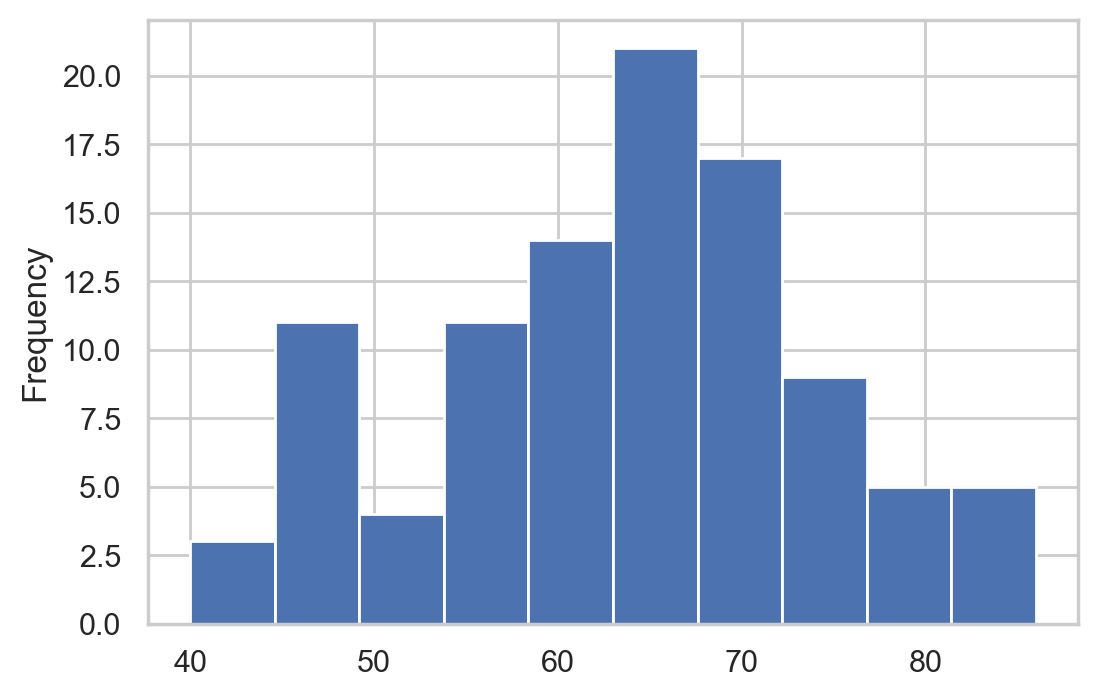

In [208]:
# this shows that the wikipedia age is actually edited-in rather than dynamically calculated

df.calculated_age.plot.hist()

In [209]:
from matplotlib import pyplot as plt

In [234]:
hist_rows = []

In [211]:
plt.rcParams['figure.dpi'] = 200

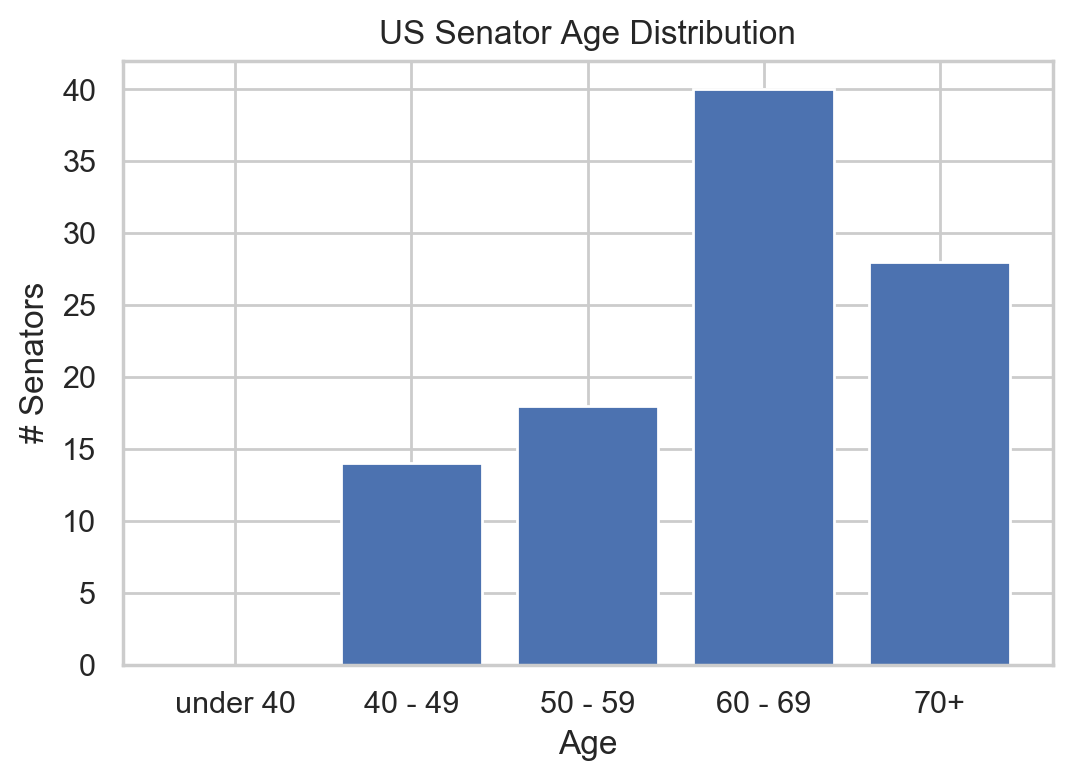

In [235]:
date_ranges = [(0, 40), (40, 50), (50, 60), (60, 70), (70, 100)]

xs = ['under 40', '40 - 49', '50 - 59', '60 - 69', '70+']
ys = []

for x_label, (min_inc, max_excl) in zip(xs, date_ranges):
    num_senators = ((df.calculated_age >= min_inc) & (df.calculated_age < max_excl)).sum()
    hist_rows.append({
        'age_range': x_label,
        'num_senators': num_senators,
        'country': 'USA',
    })
    ys.append(num_senators)


plt.bar(x=xs, height=ys)
plt.title('US Senator Age Distribution')
plt.ylabel('# Senators')
plt.xlabel('Age')

plt.show()

## extract ages of Canadian senators

By law, Canadian senators cannot be older than 75.

In [213]:
def extract_wikitable(url: str):
    """return soup table from URL"""
    
    r = requests.get(url)
    html = r.text
    soup = BeautifulSoup(html)
    table = soup.find('table', {'class': 'wikitable'})
    return table

table = extract_wikitable('https://en.wikipedia.org/wiki/List_of_current_senators_of_Canada')

In [214]:
table

<table class="sortable wikitable">
<tbody><tr>
<th align="left" class="unsortable"><sup class="reference" id="cite_ref-8"><a href="#cite_note-8">[8]</a></sup>
</th>
<th>Name
</th>
<th>Senate political affiliation
</th>
<th>Province <a href="/wiki/Canadian_Senate_divisions" title="Canadian Senate divisions">(Division)</a><sup class="reference" id="cite_ref-divisions_9-0"><a href="#cite_note-divisions-9">[a]</a></sup>
</th>
<th>Date appointed
</th>
<th colspan="2">Appointed on the advice of
</th>
<th>Mandatory retirement date
</th>
<th>Titles and notes
</th></tr>
<tr>
<td style="background:#845B87; width: 16px"> 
</td>
<td><span data-sort-value="Anderson, Margaret Dawn"><span class="vcard"><span class="fn"><a href="/wiki/Margaret_Dawn_Anderson" title="Margaret Dawn Anderson">Margaret Dawn Anderson</a></span></span></span>
</td>
<td>Independent Senators Group
</td>
<td><a href="/wiki/Northwest_Territories" title="Northwest Territories">Northwest Territories</a>
</td>
<td><span data-sort-v

In [215]:
from typing import List

def extract_table_schema(table) -> List[str]:
    cols = []
    for col in table.find('tr').findAll('th'):
        if 'colspan' in col.attrs:
            n = int(col.attrs['colspan'])
            for i in range(n):
                cols.append(f'{col.text.strip()} - {i + 1}')
        else:
            cols.append(col.text.strip())
    return cols

cols = extract_table_schema(table)

In [216]:
cols

['[8]',
 'Name',
 'Senate political affiliation',
 'Province (Division)[a]',
 'Date appointed',
 'Appointed on the advice of - 1',
 'Appointed on the advice of - 2',
 'Mandatory retirement date',
 'Titles and notes']

In [217]:
def extract_table_content(table) -> List[dict]:
    rows = []
    next_row = {}

    for i, row in enumerate(table.find('tbody').find_all('tr', recursive=False)):
        d = next_row
        next_row = {}

        if i == 0:
            # skip first row - that's the header row
            continue

        # hack for rowspan
        cols_to_search = cols[:]
        for key in d:
            cols_to_search.remove(key)

        for col, key in zip(row.find_all(['td', 'th'], recursive=False), cols_to_search):
            d[key] = col.text.replace('&nbsp;', ' ').replace('\xa0', ' ').strip()
            if 'rowspan' in col.attrs and int(col.attrs['rowspan']) == 2:
                next_row[key] = d[key]

        rows.append(d)
    return rows
    

In [218]:
rows = extract_table_content(table)

In [220]:
rows

[{'[8]': '',
  'Name': 'Margaret Dawn Anderson',
  'Senate political affiliation': 'Independent Senators Group',
  'Province (Division)[a]': 'Northwest Territories',
  'Date appointed': 'December 12, 2018',
  'Appointed on the advice of - 1': '',
  'Appointed on the advice of - 2': 'Trudeau, J.',
  'Mandatory retirement date': 'April 14, 2042',
  'Titles and notes': ''},
 {'[8]': '',
  'Name': 'Salma Ataullahjan',
  'Senate political affiliation': 'Conservative',
  'Province (Division)[a]': 'Ontario',
  'Date appointed': 'July 9, 2010',
  'Appointed on the advice of - 1': '',
  'Appointed on the advice of - 2': 'Harper',
  'Mandatory retirement date': 'April 29, 2027',
  'Titles and notes': ''},
 {'[8]': '',
  'Name': 'Denise Batters',
  'Senate political affiliation': 'Conservative',
  'Province (Division)[a]': 'Saskatchewan',
  'Date appointed': 'January 25, 2013',
  'Appointed on the advice of - 1': '',
  'Appointed on the advice of - 2': 'Harper',
  'Mandatory retirement date': 'Ju

In [221]:
can_senators = pd.DataFrame(rows)
can_senators

,[8],Name,Senate political affiliation,Province (Division)[a],Date appointed,Appointed on the advice of - 1,Appointed on the advice of - 2,Mandatory retirement date,Titles and notes
0,,Margaret Dawn Anderson,Independent Senators Group,Northwest Territories,"December 12, 2018",,"Trudeau, J.","April 14, 2042",
1,,Salma Ataullahjan,Conservative,Ontario,"July 9, 2010",,Harper,"April 29, 2027",
2,,Denise Batters,Conservative,Saskatchewan,"January 25, 2013",,Harper,"June 18, 2045",
3,,Diane Bellemare,Independent Senators Group,Quebec (Alma),"September 6, 2012",,Harper,"October 13, 2024",Legislative Deputy to Government Representativ...
4,,Wanda Thomas Bernard,Independent Senators Group,Nova Scotia,"November 10, 2016",,"Trudeau, J.","August 1, 2028",
...,...,...,...,...,...,...,...,...,...
91,,Pamela Wallin,Canadian Senators Group,Saskatchewan,"January 2, 2009",,Harper,"April 10, 2028",
92,,David Wells,Conservative,Newfoundland and Labrador,"January 25, 2013",,Harper,"February 28, 2037",
93,,Howard Wetston,Independent Senators Group,Ontario,"November 10, 2016",,"Trudeau, J.","June 3, 2022",
94,,Vernon White,Canadian Senators Group,Ontario,"February 20, 2012",,Harper,"February 21, 2034","Upon his appointment, Senator White said that ..."


In [222]:
# calculate age from mandatory retirement date
from dateutil.parser import parse

today = datetime.today()

def age_from_mandatory_retirement_date(mandatory_retirement_date: str) -> int:
    dt = parse(mandatory_retirement_date)
    years_to_retirement = (dt - today).days / 365.25
    assert years_to_retirement > 0 and years_to_retirement < 50, years_to_retirement
    
    age = int(75 - years_to_retirement)
    return age

can_senators['estimated_age'] = can_senators['Mandatory retirement date'].apply(age_from_mandatory_retirement_date)
    

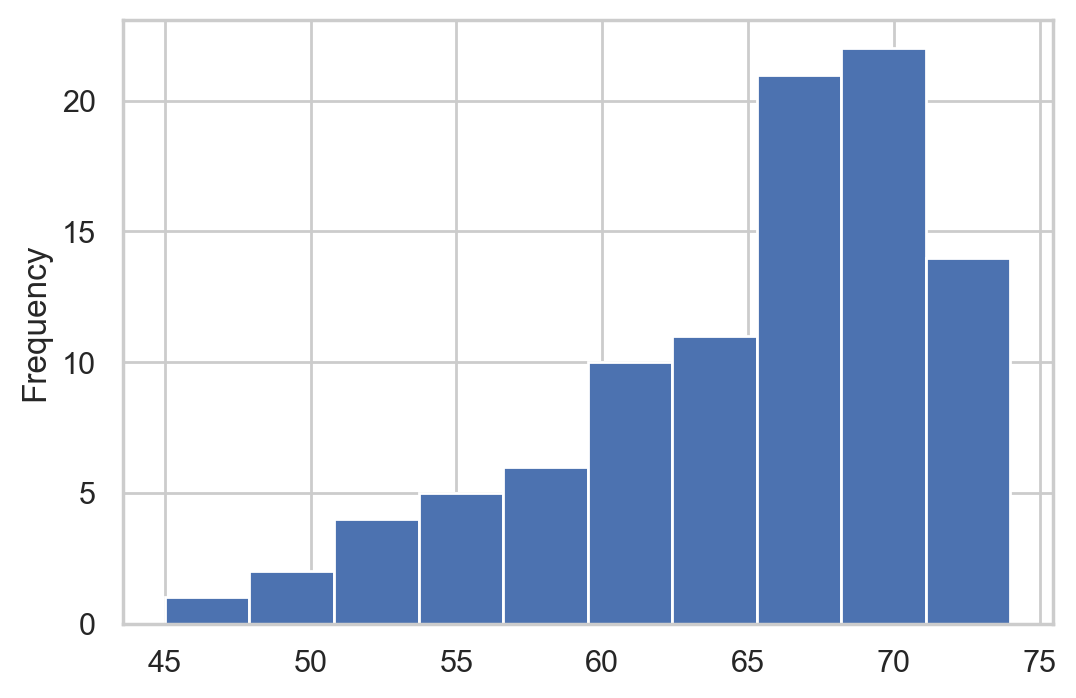

In [223]:
can_senators.estimated_age.plot.hist()

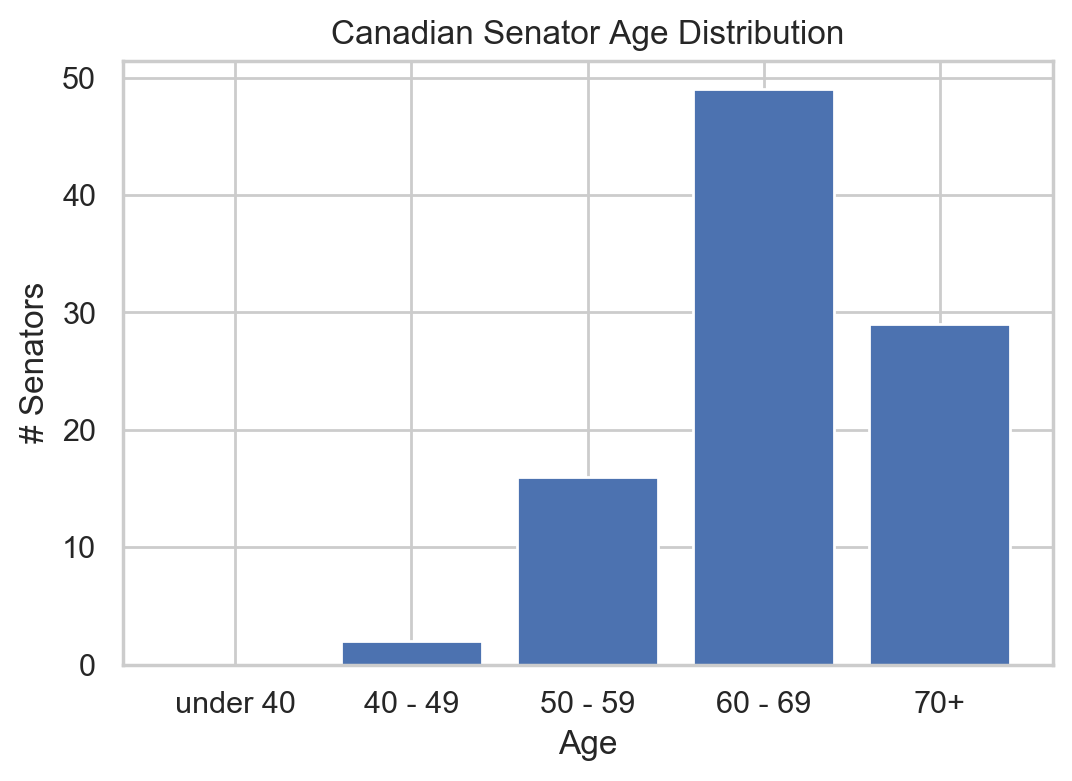

In [236]:
date_ranges = [(0, 40), (40, 50), (50, 60), (60, 70), (70, 100)]

xs = ['under 40', '40 - 49', '50 - 59', '60 - 69', '70+']
ys = []

for x_label, (min_inc, max_excl) in zip(xs, date_ranges):
    num_senators = ((can_senators.estimated_age >= min_inc) & (can_senators.estimated_age < max_excl)).sum()
    hist_rows.append({
        'age_range': x_label,
        'num_senators': num_senators,
        'country': 'Canada'
    })
    ys.append(num_senators)

plt.bar(x=xs, height=ys)
plt.title('Canadian Senator Age Distribution')
plt.ylabel('# Senators')
plt.xlabel('Age')

plt.show()

In [225]:
import seaborn as sns

In [237]:
hist_data = pd.DataFrame(hist_rows)
hist_data

,age_range,num_senators,country
0,under 40,0,USA
1,40 - 49,14,USA
2,50 - 59,18,USA
3,60 - 69,40,USA
4,70+,28,USA
5,under 40,0,Canada
6,40 - 49,2,Canada
7,50 - 59,16,Canada
8,60 - 69,49,Canada
9,70+,29,Canada


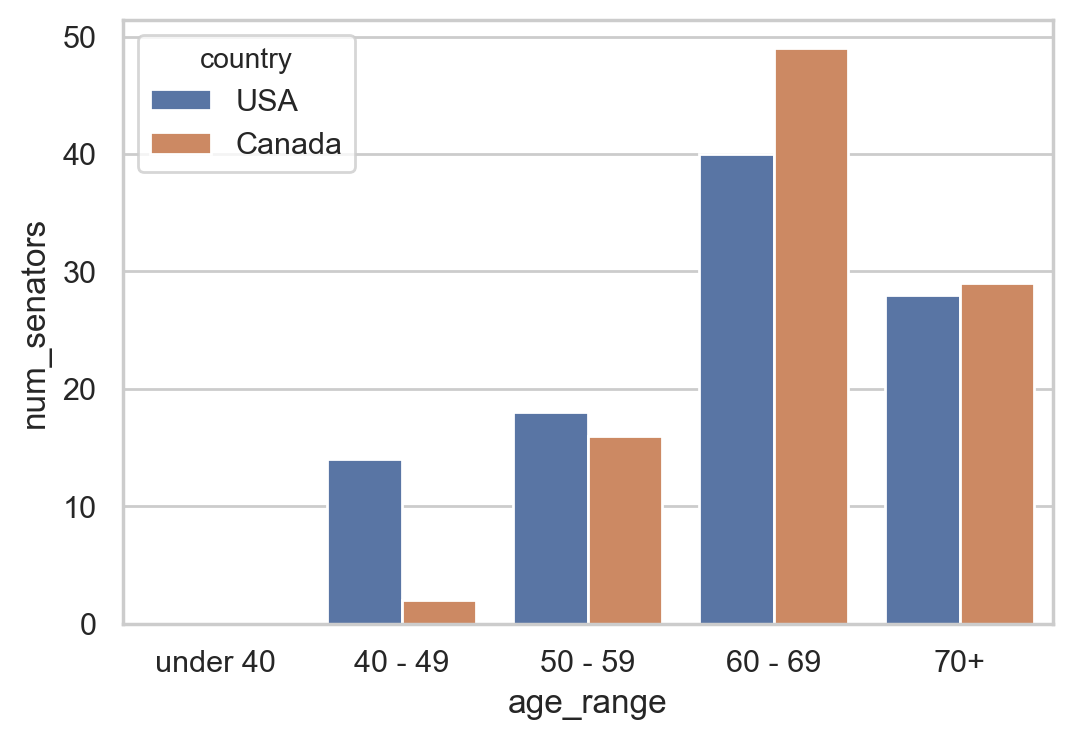

In [246]:
sns.set(style='whitegrid')
ax = sns.barplot(
    x='age_range',
    y='num_senators',
    hue='country',
    data=hist_data
)

## US House of Reps

In [247]:
url = 'https://en.wikipedia.org/wiki/List_of_current_members_of_the_United_States_House_of_Representatives'

In [248]:
def extract_wikitable(url: str, id=None):
    """return soup table from URL"""
    selector = {'class': 'wikitable'}
    if id:
        selector['id'] = id
    
    r = requests.get(url)
    html = r.text
    soup = BeautifulSoup(html)
    table = soup.find('table', selector)
    return table

reps_table = extract_wikitable(url, id='votingmembers')

In [250]:
def extract_table_schema(table) -> List[str]:
    cols = []
    for col in table.find('tr').findAll('th'):
        if 'colspan' in col.attrs:
            n = int(col.attrs['colspan'])
            for i in range(n):
                cols.append(f'{col.text.strip()} - {i + 1}')
        else:
            cols.append(col.text.strip())
    return cols

cols = extract_table_schema(reps_table)

In [251]:
cols

['District',
 'Member',
 'Party - 1',
 'Party - 2',
 'Prior experience',
 'Education',
 'Assumed office',
 'Residence',
 'Born']

In [252]:
def extract_table_content(table, cols: List[str]) -> List[dict]:
    rows = []
    next_row = {}

    for i, row in enumerate(table.find('tbody').find_all('tr', recursive=False)):
        d = next_row
        next_row = {}

        if i == 0:
            # skip first row - that's the header row
            continue

        # hack for rowspan
        cols_to_search = cols[:]
        for key in d:
            cols_to_search.remove(key)

        for col, key in zip(row.find_all(['td', 'th'], recursive=False), cols_to_search):
            d[key] = col.text.replace('&nbsp;', ' ').replace('\xa0', ' ').strip()
            if 'rowspan' in col.attrs and int(col.attrs['rowspan']) == 2:
                next_row[key] = d[key]

        rows.append(d)
    return rows

In [253]:
rows = extract_table_content(reps_table, cols)

In [254]:
len(rows)

435

In [255]:
def wikitable_to_dataframe(table) -> pd.DataFrame:
    cols = extract_table_schema(reps_table)
    rows = extract_table_content(table, cols)
    df = pd.DataFrame(rows)
    return df

In [256]:
reps = wikitable_to_dataframe(reps_table)

In [257]:
reps

,District,Member,Party - 1,Party - 2,Prior experience,Education,Assumed office,Residence,Born
0,Alabama 1,Bradley Byrne,,Republican,Alabama SenateAlabama State Board of Education,Duke University (BA)University of Alabama (JD),2014 (Special),Fairhope,1955
1,Alabama 2,Martha Roby,,Republican,"Montgomery, Alabama City Council",New York University (BM)Samford University (JD),2011,Montgomery,1976
2,Alabama 3,Mike Rogers,,Republican,"Calhoun County, Alabama CommissionerAlabama Ho...","Jacksonville State University (BA, MPA)Birming...",2003,Saks,1958
3,Alabama 4,Robert Aderholt,,Republican,"Haleyville, Alabama Municipal Judge",University of North AlabamaBirmingham–Southern...,1997,Haleyville,1965
4,Alabama 5,Mo Brooks,,Republican,Alabama House of RepresentativesMadison County...,Duke University (BA)University of Alabama (JD),2011,Huntsville,1954
...,...,...,...,...,...,...,...,...,...
430,Wisconsin 5,Jim Sensenbrenner,,Republican,Wisconsin State SenateWisconsin State Assembly,Stanford University (BA)University of Wisconsi...,1979,Menomonee Falls,1943
431,Wisconsin 6,Glenn Grothman,,Republican,Wisconsin SenateWisconsin State Assembly,"University of Wisconsin–Madison (BA, JD)",2015,Campbellsport,1955
432,Wisconsin 7,Tom Tiffany,,Republican,Wisconsin SenateWisconsin State Assembly,University of Wisconsin–River Falls (BS),2020 (Special),Minocqua,1957
433,Wisconsin 8,Mike Gallagher,,Republican,Political advisorU.S. Marine Corps,Princeton University (BA)National Intelligence...,2017,Green Bay,1984


In [258]:
reps['Born']

0      1955
1      1976
2      1958
3      1965
4      1954
       ... 
430    1943
431    1955
432    1957
433    1984
434    1966
Name: Born, Length: 435, dtype: object

In [263]:
reps.dtypes

District            object
Member              object
Party - 1           object
Party - 2           object
Prior experience    object
Education           object
Assumed office      object
Residence           object
Born                object
dtype: object

In [267]:
reps[pd.isna(pd.to_numeric(reps.Born))]

,District,Member,Party - 1,Party - 2,Prior experience,Education,Assumed office,Residence,Born
70,California 50,Vacant,,,,,,,
283,New York 27,Vacant,,,,,,,
294,North Carolina 11,Vacant,,,,,,,
364,Texas 4,Vacant,,,,,,,


In [271]:
vacant = reps[reps.Member == 'Vacant']
reps_not_vacant = reps.drop(vacant.index)

In [273]:
reps.shape

(435, 9)

In [272]:
reps_not_vacant.shape

(431, 9)

In [274]:
reps_not_vacant['Born'] = pd.to_numeric(reps_not_vacant['Born'])

In [275]:
reps_not_vacant.dtypes

District            object
Member              object
Party - 1           object
Party - 2           object
Prior experience    object
Education           object
Assumed office      object
Residence           object
Born                 int64
dtype: object

In [281]:
today = datetime.today()

# calculate the age
def calculate_approx_age(born_year: int):
    dt = datetime(year=born_year, month=1, day=1)
    years = (today - dt).days // 365.25
    return years    

reps_not_vacant['approx_age'] = reps_not_vacant['Born'].apply(calculate_approx_age)

In [262]:
# graph the histogram of their ages
def graph_age_histogram(df, title: str, age_col: str):
    date_ranges = [(0, 40), (40, 50), (50, 60), (60, 70), (70, 100)]

    xs = ['under 40', '40 - 49', '50 - 59', '60 - 69', '70+']
    ys = []

    for x_label, (min_inc, max_excl) in zip(xs, date_ranges):
        num_senators = ((df[age_col] >= min_inc) & (df[age_col] < max_excl)).sum()
#         hist_rows.append({
#             'age_range': x_label,
#             'num_senators': num_senators,
#             'country': 'Canada'
#         })
        ys.append(num_senators)

    plt.bar(x=xs, height=ys)
    plt.title(title)
    plt.ylabel('# Senators')
    plt.xlabel('Age')
    plt.show()

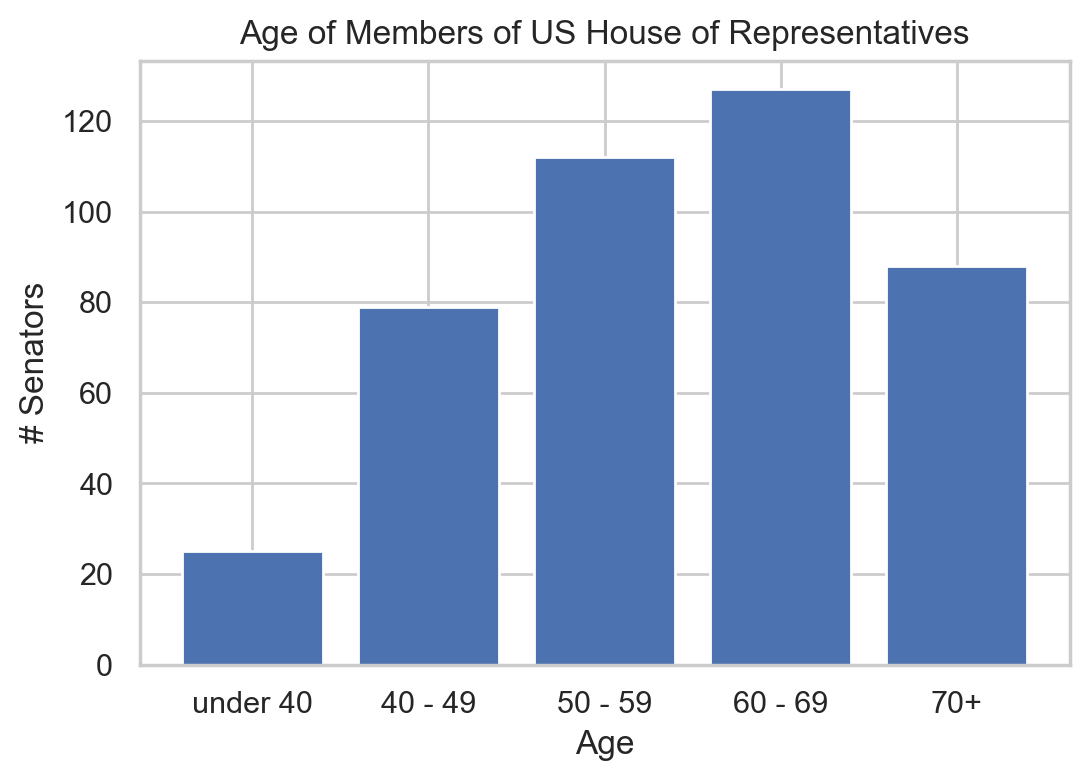

In [282]:
graph_age_histogram(reps_not_vacant, title='Age of Members of US House of Representatives', age_col='approx_age')

## Canadian Parliament

This article splits the members by province, so have to adapt our method to extract multiple tables

In [283]:
url = 'https://en.wikipedia.org/wiki/List_of_House_members_of_the_43rd_Parliament_of_Canada'

In [284]:
def extract_all_wikitables(url: str, id=None):
    """return soup table from URL"""
    selector = {'class': 'wikitable'}
    if id:
        selector['id'] = id
    
    r = requests.get(url)
    html = r.text
    soup = BeautifulSoup(html)
    tables = soup.find_all('table', selector)
    return tables

canadian_tables = extract_all_wikitables(url)

The last table is a summary table, therefore I will ignore it. Every other table represents a province or region.

In [288]:
canadian_tables[-2]

<table class="wikitable sortable">
<tbody><tr>
<th>
</th>
<th>Name
</th>
<th>Party
</th>
<th>Electoral district
</th></tr>
<tr>
<td style="background:#EA6D6A; width: 16px"> 
</td>
<td><span data-sort-value="McLeod, Michael"><span class="vcard"><span class="fn"><a href="/wiki/Michael_McLeod_(politician)" title="Michael McLeod (politician)">Michael McLeod</a></span></span></span>
</td>
<td><a href="/wiki/Liberal_Party_of_Canada" title="Liberal Party of Canada">Liberal</a>
</td>
<td><a href="/wiki/Northwest_Territories_(electoral_district)" title="Northwest Territories (electoral district)">Northwest Territories</a>
</td></tr>
<tr>
<td style="background:#F4A460; width: 16px"> 
</td>
<td><a href="/wiki/Mumilaaq_Qaqqaq" title="Mumilaaq Qaqqaq">Mumilaaq Qaqqaq</a>
</td>
<td><a href="/wiki/New_Democratic_Party" title="New Democratic Party">NDP</a>
</td>
<td><a href="/wiki/Nunavut_(electoral_district)" title="Nunavut (electoral district)">Nunavut</a>
</td></tr>
<tr>
<td style="background:#EA6D

In [289]:
frames = []

for table in canadian_tables[:-1]:
    frames.append(wikitable_to_dataframe(table))
    
frames[0]

,District,Member,Party - 1,Party - 2
0,,Blake Richards,Conservative,Banff—Airdrie
1,,Damien Kurek,Conservative,Battle River—Crowfoot
2,,Martin Shields,Conservative,Bow River
3,,Greg McLean,Conservative,Calgary Centre
4,,Len Webber,Conservative,Calgary Confederation
5,,Jasraj Hallan,Conservative,Calgary Forest Lawn
6,,Bob Benzen,Conservative,Calgary Heritage
7,,Stephanie Kusie,Conservative,Calgary Midnapore
8,,Michelle Rempel Garner,Conservative,Calgary Nose Hill
9,,Pat Kelly,Conservative,Calgary Rocky Ridge


### extracting age

Oh tragedy of tragedies, the ages are not present on these pages. Perhaps I can fetch them from the individual pages

In [290]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11685 sha256=5e2af463578ca914046a8660bdba822c04ecaa96e92bbfabcce2ebf466fb0c69
  Stored in directory: /Users/daniel_kats/Library/Caches/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [294]:
import wikipedia as wiki
page = wiki.page("Mike Lake (politician)")

In [299]:
page.summary

'Michael Stanley "Mike" Lake   (born June 4, 1969) is a Canadian politician, businessman, and sports executive in Alberta, Canada who represented the riding of Edmonton—Mill Woods—Beaumont from 2006 to 2015 and has represented Edmonton—Wetaskiwin since 2015. He is a member of the Conservative Party of Canada and served as Parliamentary Secretary of Industry under Prime Minister Stephen Harper.'

In [297]:
page.sections

[]

let's see if I can actually extract a link to each person

In [300]:
def extract_table_contents_with_links(table, cols) -> List[dict]:
    rows = []
    next_row = {}

    for i, row in enumerate(table.find('tbody').find_all('tr', recursive=False)):
        d = next_row
        next_row = {}

        if i == 0:
            # skip first row - that's the header row
            continue

        # hack for rowspan
        cols_to_search = cols[:]
        for key in d:
            cols_to_search.remove(key)

        for col, key in zip(row.find_all(['td', 'th'], recursive=False), cols_to_search):
            d[key] = col.text.replace('&nbsp;', ' ').replace('\xa0', ' ').strip()
            if 'rowspan' in col.attrs and int(col.attrs['rowspan']) == 2:
                next_row[key] = d[key]
                
            anchor = col.find('a')
            if anchor:
                d[key + '_link'] = anchor.attrs['href']

        rows.append(d)
    return rows

In [303]:
def wikitable_to_dataframe(table) -> pd.DataFrame:
    cols = extract_table_schema(reps_table)
    rows = extract_table_contents_with_links(table, cols)
    df = pd.DataFrame(rows)
    return df

In [304]:
frames = []

for table in canadian_tables[:-1]:
    frames.append(wikitable_to_dataframe(table))
    
frames[0]

,District,Member,Member_link,Party - 1,Party - 1_link,Party - 2,Party - 2_link
0,,Blake Richards,/wiki/Blake_Richards,Conservative,/wiki/Conservative_Party_of_Canada,Banff—Airdrie,/wiki/Banff%E2%80%94Airdrie
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot
2,,Martin Shields,/wiki/Martin_Shields,Conservative,NaN,Bow River,/wiki/Bow_River_(electoral_district)
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre
4,,Len Webber,/wiki/Len_Webber,Conservative,NaN,Calgary Confederation,/wiki/Calgary_Confederation
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,NaN,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn
6,,Bob Benzen,/wiki/Bob_Benzen,Conservative,NaN,Calgary Heritage,/wiki/Calgary_Heritage
7,,Stephanie Kusie,/wiki/Stephanie_Kusie,Conservative,NaN,Calgary Midnapore,/wiki/Calgary_Midnapore
8,,Michelle Rempel Garner,/wiki/Michelle_Rempel_Garner,Conservative,NaN,Calgary Nose Hill,/wiki/Calgary_Nose_Hill
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,NaN,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge


In [309]:
def title_from_relative_link(s: str):
    return s.replace('/wiki/', '', 1).replace('_', ' ')

# let's pick the first frame
# let's pick the first person
title = title_from_relative_link(frames[0].iloc[0]['Member_link'])
title

'Blake Richards'

In [311]:
pg = wiki.page(title=title)
pg

<WikipediaPage 'Blake Richards'>

In [312]:
pg.summary

'Blake Richards  (born November 8, 1974) is a Canadian politician, who was re-elected for a third term in the riding of Banff—Airdrie on October 19, 2015. He was previously elected in the electoral district of Wild Rose in the 2008 Canadian federal election and the 2011 election, and is a member of the Conservative Party in the House of Commons of Canada.'

In [313]:
# the standard pattern is  ... (born <>)

In [314]:
pattern = re.compile(r'\(born .*?\)')

In [317]:
s = pattern.search(pg.summary).group()
s

'(born November 8, 1974)'

In [318]:
date_str = s.replace('(born ', '').replace(')', '')
date_str

'November 8, 1974'

In [319]:
dt = parse(date_str)
dt

datetime.datetime(1974, 11, 8, 0, 0)

In [459]:
def get_age_from_birthday(dt: datetime) -> Optional[int]:
    if dt is None or pd.isna(dt):
        return None
    else:
        today = datetime.today()
        years = (today - dt).days // 365.25
        return int(years)

age = get_age_from_birthday(dt)
age

45

In [350]:
from dateutil.parser import ParserError
from typing import Optional


def read_age_from_wikipedia_page(member_link: str) -> Optional[int]:
    title = title_from_relative_link(member_link)
    try:
        pg = wiki.page(title=title)
    except wiki.PageError as e:
        print(f'failed to load page with title {title}')
        print(e)
        return None
    print(f'loaded Wiki page for {member_link}')
    pattern = re.compile(r'\(.*?born .*?\)')
    try:
        s = pattern.search(pg.summary).group()
    except AttributeError:
        print(f'ERROR: failed to extract birthday from string: {pg.summary}')
        return None
    print(f'Found born pattern: {s}')
    date_str = s.replace('(born ', '').replace(')', '')
    try:
        dt = parse(date_str)
        age = get_age_from_birthday(dt)
        return age
    except ParserError:
        print(f'ERROR: Failed to extract date from string: {date_str}')
        return None

In [345]:
frames[0].iloc[1]['Member_link']

'/wiki/Damien_Kurek'

In [346]:
read_age_from_wikipedia_page('/wiki/Damien_Kurek')

loaded Wiki page for /wiki/Damien_Kurek
Found born pattern: (born 1989 or 1990)
ERROR: Failed to extract date from string: 1989 or 1990


In [347]:
frames[0].iloc[2]['Member_link']

'/wiki/Martin_Shields'

In [348]:
read_age_from_wikipedia_page(frames[0].iloc[2]['Member_link'])

loaded Wiki page for /wiki/Martin_Shields
Found born pattern: (born April 28, 1948)


72

In [351]:
frames[0]['age'] = frames[0]['Member_link'].apply(read_age_from_wikipedia_page)

loaded Wiki page for /wiki/Blake_Richards
Found born pattern: (born November 8, 1974)
loaded Wiki page for /wiki/Damien_Kurek
Found born pattern: (born 1989 or 1990)
ERROR: Failed to extract date from string: 1989 or 1990
loaded Wiki page for /wiki/Martin_Shields
Found born pattern: (born April 28, 1948)
loaded Wiki page for /wiki/Greg_McLean_(politician)
ERROR: failed to extract birthday from string: Greg McLean  is a Canadian politician who was elected to represent the riding of Calgary Centre in the House of Commons of Canada in the 2019 Canadian federal election.  He is an investment portfolio manager.He defeated former cabinet minister Kent Hehr by 20,000 votes.McLean previously served as a director of a public oil and gas company and is currently a director of a private oil and gas services technology company.
loaded Wiki page for /wiki/Len_Webber
Found born pattern: (born November 10, 1960)
loaded Wiki page for /wiki/Jasraj_Hallan
ERROR: failed to extract birthday from string: J

In [352]:
frames[0]

,District,Member,Member_link,Party - 1,Party - 1_link,Party - 2,Party - 2_link,age
0,,Blake Richards,/wiki/Blake_Richards,Conservative,/wiki/Conservative_Party_of_Canada,Banff—Airdrie,/wiki/Banff%E2%80%94Airdrie,45.0
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN
2,,Martin Shields,/wiki/Martin_Shields,Conservative,NaN,Bow River,/wiki/Bow_River_(electoral_district),72.0
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN
4,,Len Webber,/wiki/Len_Webber,Conservative,NaN,Calgary Confederation,/wiki/Calgary_Confederation,59.0
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,NaN,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN
6,,Bob Benzen,/wiki/Bob_Benzen,Conservative,NaN,Calgary Heritage,/wiki/Calgary_Heritage,61.0
7,,Stephanie Kusie,/wiki/Stephanie_Kusie,Conservative,NaN,Calgary Midnapore,/wiki/Calgary_Midnapore,47.0
8,,Michelle Rempel Garner,/wiki/Michelle_Rempel_Garner,Conservative,NaN,Calgary Nose Hill,/wiki/Calgary_Nose_Hill,NaN
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,NaN,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge,NaN


In [353]:
for i in range(1, len(frames)):
    frames[i]['age'] = frames[i]['Member_link'].apply(read_age_from_wikipedia_page)

loaded Wiki page for /wiki/Ed_Fast
Found born pattern: (born June 18, 1955)
loaded Wiki page for /wiki/Terry_Beech
Found born pattern: (born April 2, 1981)
loaded Wiki page for /wiki/Jagmeet_Singh
Found born pattern: (born January 2, 1979)
loaded Wiki page for /wiki/Todd_Doherty
Found born pattern: (born 1968 or 1969)
ERROR: Failed to extract date from string: 1968 or 1969
loaded Wiki page for /wiki/Dan_Albas
Found born pattern: (born December 1, 1976)
loaded Wiki page for /wiki/Mark_Strahl
Found born pattern: (born March 26, 1978)
loaded Wiki page for /wiki/Tamara_Jansen
Found born pattern: (born 1967 or 1968)
ERROR: Failed to extract date from string: 1967 or 1968
loaded Wiki page for /wiki/Ron_McKinnon
Found born pattern: (born August 8, 1951)
loaded Wiki page for /wiki/Gord_Johns
Found born pattern: (born November 29, 1969)
loaded Wiki page for /wiki/Alistair_MacGregor
Found born pattern: (born 1978 or 1979)
ERROR: Failed to extract date from string: 1978 or 1979
loaded Wiki page f

/Users/Daniel_Kats/anaconda3/lib/python3.7/site-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/Daniel_Kats/anaconda3/lib/python3.7/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


DisambiguationError: "Brenda Shanahan" may refer to: 
Brenda Shanahan (businesswoman)
Brenda Shanahan (politician)

In [471]:
# combine the frames

def combine_frames(frames):
    master_df = pd.DataFrame()
    for frame in frames:
        master_df = master_df.append(frame)
    return master_df.reset_index(drop=True)

master_df = combine_frames(frames)

In [472]:
master_df

,District,Member,Member_link,Party - 1,Party - 1_link,Party - 2,Party - 2_link,age
0,,Blake Richards,/wiki/Blake_Richards,Conservative,/wiki/Conservative_Party_of_Canada,Banff—Airdrie,/wiki/Banff%E2%80%94Airdrie,45.0
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN
2,,Martin Shields,/wiki/Martin_Shields,Conservative,NaN,Bow River,/wiki/Bow_River_(electoral_district),72.0
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN
4,,Len Webber,/wiki/Len_Webber,Conservative,NaN,Calgary Confederation,/wiki/Calgary_Confederation,59.0
...,...,...,...,...,...,...,...,...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN
334,,Cathay Wagantall,/wiki/Cathay_Wagantall,Conservative,NaN,Yorkton—Melville,/wiki/Yorkton%E2%80%94Melville,NaN
335,,Michael McLeod,/wiki/Michael_McLeod_(politician),Liberal,/wiki/Liberal_Party_of_Canada,Northwest Territories,/wiki/Northwest_Territories_(electoral_district),NaN
336,,Mumilaaq Qaqqaq,/wiki/Mumilaaq_Qaqqaq,NDP,/wiki/New_Democratic_Party,Nunavut,/wiki/Nunavut_(electoral_district),NaN


In [363]:
master_df[pd.isna(master_df['age'])]

,District,Member,Member_link,Party - 1,Party - 1_link,Party - 2,Party - 2_link,age
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,NaN,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN
8,,Michelle Rempel Garner,/wiki/Michelle_Rempel_Garner,Conservative,NaN,Calgary Nose Hill,/wiki/Calgary_Nose_Hill,NaN
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,NaN,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge,NaN
...,...,...,...,...,...,...,...,...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN
334,,Cathay Wagantall,/wiki/Cathay_Wagantall,Conservative,NaN,Yorkton—Melville,/wiki/Yorkton%E2%80%94Melville,NaN
335,,Michael McLeod,/wiki/Michael_McLeod_(politician),Liberal,/wiki/Liberal_Party_of_Canada,Northwest Territories,/wiki/Northwest_Territories_(electoral_district),NaN
336,,Mumilaaq Qaqqaq,/wiki/Mumilaaq_Qaqqaq,NDP,/wiki/New_Democratic_Party,Nunavut,/wiki/Nunavut_(electoral_district),NaN


In [364]:
missing_members = master_df[pd.isna(master_df['age'])]

In [365]:
def extract_infobox(url: str):
    r = requests.get(url)
    soup = BeautifulSoup(r.text)
    return soup.find('table', {'class': 'infobox'})

In [368]:
url = 'https://en.wikipedia.org' + missing_members.iloc[0]['Member_link']
url

'https://en.wikipedia.org/wiki/Damien_Kurek'

In [369]:
infobox = extract_infobox(url)

In [370]:
infobox

<table class="infobox vcard" style="width:22em"><tbody><tr><th colspan="2" style="text-align:center;font-size:125%;font-weight:bold;font-size: 100%;"><div class="fn" style="display:inline-block; font-size:130%;">Damien Kurek</div><br/><div class="honorific-suffix" style="display:inline; font-weight: normal;"><span class="noexcerpt nowraplinks" style="font-size:100%;"><a href="/wiki/House_of_Commons_of_Canada" title="House of Commons of Canada">MP</a></span></div></th></tr><tr><td colspan="2" style="text-align:center"></td></tr><tr><th colspan="2" style="text-align:center;background:lavender;line-height:normal;padding:0.2em 0.2em">Member of the <span style="display: inline-block;"><a class="mw-redirect" href="/wiki/Canadian_Parliament" title="Canadian Parliament">Canadian Parliament</a></span><br/>for <a href="/wiki/Battle_River%E2%80%94Crowfoot" title="Battle River—Crowfoot">Battle River—Crowfoot</a></th></tr><tr><td colspan="2" style="text-align:center;border-bottom:none"><div style="

In [371]:
!pip install wptools

In [372]:
import wptools

In [373]:
page = wptools.page('Damien Kurek')
page.get_parse()

en.wikipedia.org (parse) Damien Kurek
Damien Kurek (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62125831
  parsetree: <str(9448)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Damien Kurek
  wikibase: Q71920912
  wikidata_url: https://www.wikidata.org/wiki/Q71920912
  wikitext: <str(3746)> {{Infobox officeholder| honorific-prefix =...
}


In [374]:
d = _

In [382]:
d.data['infobox']

{'name': 'Damien Kurek',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'riding': '[[Battle River—Crowfoot]]',
 'parliament': 'Canadian',
 'term_start': 'October 21, 2019',
 'predecessor': '[[Kevin Sorenson]]',
 'birth_date': '{{Birth based on age as of date|29|2019|9|25}}',
 'party': '[[Conservative Party of Canada]]',
 'residence': '[[Camrose, Alberta]]'}

In [388]:
from pprint import pprint


def get_birthday(member_link: str) -> Optional[str]:
    title = title_from_relative_link(member_link)
    try:
        page = wptools.page(title)
        d = page.get_parse()
    except LookupError as e:
        print(f'failed to get page for title {title}')
        print(e)
        return None
    try:
        return d.data['infobox']['birth_date']
    except KeyError:
        pprint(d.data['infobox'])
        return None

birthdays = missing_members.Member_link.apply(get_birthday)

en.wikipedia.org (parse) Damien Kurek
Damien Kurek (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62125831
  parsetree: <str(9448)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Damien Kurek
  wikibase: Q71920912
  wikidata_url: https://www.wikidata.org/wiki/Q71920912
  wikitext: <str(3746)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Greg McLean (politician)
en.wikipedia.org (imageinfo) File:Greg McLean in Calgary - 2019 (...
Greg McLean (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Greg McLe...
  infobox: <dict(13)> name, honorific-suffix, image, caption, ridi...
  pageid: 62125806
  parsetree: <str(5094)> <root><template><title>Infobox officehold...
  requests: <list(2)> parse, imageinfo
  title: Greg McLean (politician)
  wikibase: Q71920931
  wikidata_url: https://www.wikidata.org/wiki/Q71920931
  wikitext: <str(2846)> {{Infobox officeho

{'alma_mater': '[[University of Alberta]]',
 'caption': 'McLean in Calgary in 2019',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'Greg McLean in Calgary - 2019 (48231547782) (cropped).jpg',
 'name': 'Greg McLean',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Kent Hehr]]',
 'profession': '[[Member of Parliament]]',
 'residence': '[[Calgary]], [[Alberta]]',
 'riding': '[[Calgary Centre]]',
 'spouse': 'Ruth',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:JasrajSinghHallan.jpg
Jasraj Hallan (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:JasrajSin...
  infobox: <dict(11)> name, honorific-suffix, image, imagesize, ri...
  pageid: 62125711
  parsetree: <str(10967)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Jasraj Hallan
  wikibase: Q71921024
  wikidata_url: https://www.wikidata.org/wiki/Q71921024
  wikitext: <str(4255)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Michelle Rempel Garner


{'birth_place': '[[Dubai]], [[United Arab Emirates]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'JasrajSinghHallan.jpg',
 'imagesize': '200px',
 'name': 'Jasraj Singh Hallan',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Deepak Obhrai]]',
 'residence': '[[Calgary]], [[Alberta]]',
 'riding': '[[Calgary Forest Lawn]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:Michelle Rempel 2017 (cropped).jpg
Michelle Rempel Garner (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Michelle ...
  infobox: <dict(28)> honorific-prefix, name, image, honorific-suf...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:M...
  pageid: 31674576
  parsetree: <str(35979)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Michelle Rempel Garner
  wikibase: Q3311457
  wikidata_url: https://www.wikidata.org/wiki/Q3311457
  wikitext: <str(19886)> {{short description|Conservative Party Me...
}
en.wikipedia.org (parse) Pat Kelly (politician)
Pat Kelly (politician) (en) data
{
  infobox: <dict(15)> name, honorific-suffix, imagesize, office, l...
  pageid: 48297813
  parsetree: <str(14845)> <root><template><title>short description...
  requests: <list(1)> parse
  title: Pat Kelly (politician)
  wikibase: Q22278561
  wikidata_url: https://www.wikidata.org/wiki/Q2227856

{'birth_place': '[[Evansburg, Alberta]], Canada',
 'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'imagesize': '200px',
 'name': 'Gerald Soroka',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Jim Eglinski]]',
 'riding': '[[Yellowhead (electoral district)|Yellowhead]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:MPDoherty.png
Todd Doherty (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:MPDoherty...
  infobox: <dict(17)> name, image, office, leader, term_start, pre...
  pageid: 48300058
  parsetree: <str(12341)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Todd Doherty
  wikibase: Q22277600
  wikidata_url: https://www.wikidata.org/wiki/Q22277600
  wikitext: <str(5727)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Tamara Jansen
Tamara Jansen (en) data
{
  infobox: <dict(9)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62127429
  parsetree: <str(8678)> <root><template><title>short description<...
  requests: <list(1)> parse
  title: Tamara Jansen
  wikibase: Q71942375
  wikidata_url: https://www.wikidata.org/wiki/Q71942375
  wikitext: <str(3193)> {{short description|Canadian politician}}{...
}
en.wikipedia.org (parse) Alistair MacGregor
Alistair MacGregor

{'alma_mater': '[[University of Victoria]]<br />[[Royal Roads University]]',
 'birth_place': '[[Victoria, British Columbia]]',
 'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'imagesize': '200px',
 'name': 'Alistair MacGregor',
 'parliament': 'Canadian',
 'party': '[[New Democratic Party]]',
 'predecessor': '[[Jean Crowder]]',
 'profession': 'Executive Assistant',
 'residence': '[[Duncan, British Columbia]]',
 'riding': '[[Cowichan—Malahat—Langford]]',
 'term_start': 'October 19, 2015'}


en.wikipedia.org (imageinfo) File:Carla Qualtrough MP.jpg
Carla Qualtrough (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Carla Qua...
  infobox: <dict(31)> honorific-prefix, name, honorific-suffix, im...
  pageid: 48298426
  parsetree: <str(22860)> <root><template><title>Use mdy dates</ti...
  requests: <list(2)> parse, imageinfo
  title: Carla Qualtrough
  wikibase: Q21384927
  wikidata_url: https://www.wikidata.org/wiki/Q21384927
  wikitext: <str(14847)> {{Use mdy dates|date=November 2015}}{{Use...
}
en.wikipedia.org (parse) Tracy Gray
Tracy Gray (en) data
{
  infobox: <dict(17)> name, honorific-suffix, imagesize, riding1, ...
  pageid: 62127321
  parsetree: <str(24863)> <root><template><title>Infobox officehol...
  requests: <list(1)> parse
  title: Tracy Gray
  wikibase: Q71936974
  wikidata_url: https://www.wikidata.org/wiki/Q71936974
  wikitext: <str(19069)> {{Infobox officeholder| honorific-prefix ...
}
en.wikipedia.org (parse) Rob Morrison (politician)
Ro

{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Rob Morrison',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Wayne Stetski]]',
 'profession': 'public servant',
 'residence': '[[Creston, British Columbia]]',
 'riding': '[[Kootenay—Columbia]]',
 'term_start': 'October 21, 2019'}


Brad Vis (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62127421
  parsetree: <str(4486)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Brad Vis
  wikibase: Q71942395
  wikidata_url: https://www.wikidata.org/wiki/Q71942395
  wikitext: <str(2044)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Paul Manly
en.wikipedia.org (imageinfo) File:Paul Manly, MP.jpg
Paul Manly (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Paul Manl...
  infobox: <dict(14)> name, honorific-suffix, image, riding1, parl...
  pageid: 60686533
  parsetree: <str(10714)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Paul Manly
  wikibase: Q63565674
  wikidata_url: https://www.wikidata.org/wiki/Q63565674
  wikitext: <str(7776)> {{short description|Canadian politician}}{...
}
en.wikipedia.org (parse) Rachel Blaney
en.wikipedia.org (imageinfo) File:R

{'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'imagesize': '200px',
 'name': 'Taylor Bachrach',
 'parliament': 'Canadian',
 'party': '[[New Democratic Party]]',
 'predecessor': '[[Nathan Cullen]]',
 'riding': '[[Skeena—Bulkley Valley]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:Kenny Chiu (cropped).jpg
Kenny Chiu (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Kenny Chi...
  infobox: <dict(11)> name, honorific-suffix, image, imagesize, ri...
  pageid: 62127217
  parsetree: <str(14126)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Kenny Chiu
  wikibase: Q71937003
  wikidata_url: https://www.wikidata.org/wiki/Q71937003
  wikitext: <str(5304)> {{short description|Canadian politician}}{...
}
en.wikipedia.org (parse) Harjit Sajjan


{'birth_place': '[[Hong Kong]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'Kenny Chiu (cropped).jpg',
 'imagesize': '200px',
 'name': 'Kenny Chiu',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Joe Peschisolido]]',
 'profession': 'Software engineer',
 'riding': '[[Steveston—Richmond East]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:Harjit Sajjan at NATO in Belgiu...
Harjit Sajjan (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Harjit Sa...
  infobox: <dict(27)> honorific-prefix, name, honorific-suffix, im...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:H...
  pageid: 48298448
  parsetree: <str(49452)> <root><template><title>Use mdy dates</ti...
  requests: <list(2)> parse, imageinfo
  title: Harjit Sajjan
  wikibase: Q21336246
  wikidata_url: https://www.wikidata.org/wiki/Q21336246
  wikitext: <str(31618)> {{Use mdy dates|date=November 2015}}{{Inf...
}
en.wikipedia.org (parse) Laurel Collins
Laurel Collins (en) data
{
  infobox: <dict(15)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62127402
  parsetree: <str(7340)> <root><template><title>short description<...
  requests: <list(1)> parse
  title: Laurel Collins
  wikibase: Q71942460
  wikidata_url: https://www.wikidata.org/wiki/Q71942460
  wikitext: <str(4527)> {{short descri

failed to get page for title Ren%C3%A9 Arseneault
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Ren%25C3%25A9%20Arseneault


Ginette Petitpas Taylor (en) data
{
  infobox: <dict(31)> honorific-prefix, name, honorific-suffix, of...
  pageid: 48296739
  parsetree: <str(21322)> <root><template><title>Infobox CanadianM...
  requests: <list(1)> parse
  title: Ginette Petitpas Taylor
  wikibase: Q21714336
  wikidata_url: https://www.wikidata.org/wiki/Q21714336
  wikitext: <str(9670)> {{Infobox CanadianMP| honorific-prefix =[[...
}
en.wikipedia.org (parse) Richard Bragdon


{'alma_mater': '[[Université de Moncton]]',
 'birth_place': '[[Dieppe, New Brunswick]], Canada',
 'honorific-prefix': '[[The Honourable]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|PC|MP|size|=|100%}}',
 'minister3': '[[Bill Morneau]]',
 'name': 'Ginette Petitpas Taylor',
 'office': '[[Party Whip (Canada)|Deputy Government Whip]]',
 'office2': '[[Minister of Health (Canada)|Minister of Health]]',
 'office3': '[[Parliamentary Secretary]] to the [[Minister of Finance '
            '(Canada)|Minister of Finance]]',
 'parliament4': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Linda Lapointe]]',
 'predecessor1': '[[Dave MacKenzie (politician)|Dave MacKenzie]]',
 'predecessor2': '[[Jane Philpott]]',
 'predecessor3': '[[François-Philippe Champagne]]',
 'predecessor4': '[[Robert Goguen]]',
 'primeminister': '[[Justin Trudeau]]',
 'primeminister1': '[[Justin Trudeau]]',
 'primeminister2': '[[Justin Trudeau]]',
 'riding4': '[[Moncton—Riverview—Dieppe

Richard Bragdon (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62124922
  parsetree: <str(13606)> <root><template><title>short description...
  requests: <list(1)> parse
  title: Richard Bragdon
  wikibase: Q71894607
  wikidata_url: https://www.wikidata.org/wiki/Q71894607
  wikitext: <str(4381)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Mike Kelloway
Mike Kelloway (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62126104
  parsetree: <str(9249)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Mike Kelloway
  wikibase: Q71930000
  wikidata_url: https://www.wikidata.org/wiki/Q71930000
  wikitext: <str(3175)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Carol Hughes (politician)
en.wikipedia.org (imageinfo) File:Carol Hughes.jpg
Carol Hughes (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'f

{'birth_place': '[[Montreal]], [[Quebec]]',
 'caption': 'Brassard in 2019',
 'image': 'John Brassard - 2019 (47899551081) (cropped).jpg',
 'leader': '[[Andrew Scheer]]',
 'leader2': '[[Rona Ambrose]]<br />[[Andrew Scheer]]',
 'name': 'John Brassard',
 'office': '[[Party Whip (Canada)|Deputy Opposition Whip]]',
 'office2': '[[Minister of Veterans Affairs (Canada)|Official Opposition '
            'Critic for Veterans Affairs]]',
 'office3': '[[Barrie City Council]]lor',
 'parliament1': 'Canadian',
 'predecessor': '[[Dave MacKenzie (politician)|Dave MacKenzie]]',
 'predecessor1': "''Riding established''",
 'predecessor2': '[[Alupa Clarke]]',
 'predecessor3': 'Steve Trotter',
 'riding1': '[[Barrie—Innisfil]]',
 'successor2': '[[Steven Blaney]]',
 'successor3': 'Andrew Prince',
 'term_end2': 'August 29, 2017',
 'term_end3': 'November 2, 2015',
 'term_start': 'August 29, 2017',
 'term_start1': 'October 19, 2015',
 'term_start2': 'October 16, 2016',
 'term_start3': 'November 13, 2006'}


Doug Shipley (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62126273
  parsetree: <str(8896)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Doug Shipley
  wikibase: Q71929954
  wikidata_url: https://www.wikidata.org/wiki/Q71929954
  wikitext: <str(3365)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Nathaniel Erskine-Smith
en.wikipedia.org (imageinfo) File:HOC-2019-1122-BT-15-371-2.jpg
Nathaniel Erskine-Smith (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:HOC-2019-...
  infobox: <dict(14)> name, honorific-suffix, image, riding, parli...
  iwlinks: <list(1)> https://en.wikiquote.org/wiki/Special:Search/...
  pageid: 48304559
  parsetree: <str(38692)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Nathaniel Erskine-Smith
  wikibase: Q20676568
  wikidata_url: https://www.wikidata.org/wiki/Q20676568
  wikitext: <str(2

{'alma_mater': '[[McGill University]]<br />[[University of British Columbia]]',
 'birth_place': '[[Toronto|Toronto, Ontario]], Canada',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'Julie Dzerowicz.jpg',
 'imagesize': '200px',
 'name': 'Julie Dzerowicz',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Andrew Cash]]',
 'residence': '[[Davenport, Toronto|Davenport, Toronto, Ontario]]',
 'riding': '[[Davenport (electoral district)|Davenport]]',
 'term_start': 'October 19, 2015'}


en.wikipedia.org (imageinfo) File:Han Dong - 2018 (cropped).jpg
Han Dong (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Han Dong ...
  infobox: <dict(21)> name, native_name, honorific-suffix, image, ...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:H...
  pageid: 43043951
  parsetree: <str(23871)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Han Dong (politician)
  wikibase: Q17183113
  wikidata_url: https://www.wikidata.org/wiki/Q17183113
  wikitext: <str(13630)> {{short description|Canadian politician|b...
}
en.wikipedia.org (parse) Erin O'Toole
API error: {'code': 'invalidtitle', 'info': 'Bad title "Erin O%27Toole".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (

failed to get page for title Erin O%27Toole
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Erin%20O%2527Toole


Marco Mendicino (en) data
{
  infobox: <dict(29)> honorific-prefix, name, honorific-suffix, of...
  pageid: 48298275
  parsetree: <str(16054)> <root><template><title>Infobox CanadianM...
  requests: <list(1)> parse
  title: Marco Mendicino
  wikibase: Q21336208
  wikidata_url: https://www.wikidata.org/wiki/Q21336208
  wikitext: <str(8794)> {{Infobox CanadianMP| honorific-prefix = [...
}
en.wikipedia.org (parse) Karen Vecchio
Karen Vecchio (en) data
{
  infobox: <dict(20)> name, honorific-suffix, imagesize, office, l...
  pageid: 48298470
  parsetree: <str(5608)> <root><template><title>Infobox CanadianMP...
  requests: <list(1)> parse
  title: Karen Vecchio
  wikibase: Q22704261
  wikidata_url: https://www.wikidata.org/wiki/Q22704261
  wikitext: <str(3135)> {{Infobox CanadianMP| honorific-prefix = |...
}
en.wikipedia.org (parse) Chris Lewis (politician)
Chris Lewis (politician) (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62126549
  parsetr

{'children': 'Declan',
 'honorific-suffix': '[[Member of Parliament (Canada)|MP]]',
 'image': 'MPSchmale.png',
 'imagesize': '200px',
 'name': 'Jamie Schmale',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada|Conservative]]',
 'predecessor': '[[Barry Devolin]]',
 'residence': '[[Ottawa, Ontario| Ottawa]]',
 'riding': '[[Haliburton—Kawartha Lakes—Brock]]',
 'spouse': 'Julia Schmale',
 'term_start': 'October 19, 2015'}


en.wikipedia.org (imageinfo) File:Councillor Matthew Green.jpg
Matthew Green (Canadian politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Councillo...
  infobox: <dict(16)> name, honorific-suffix, image, caption, ridi...
  pageid: 62131751
  parsetree: <str(11365)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Matthew Green (Canadian politician)
  wikibase: Q85784352
  wikidata_url: https://www.wikidata.org/wiki/Q85784352
  wikitext: <str(3825)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Scott Duvall
en.wikipedia.org (imageinfo) File:MP Scott Duvall (cropped).jpg
Scott Duvall (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:MP Scott ...
  infobox: <dict(19)> name, honorific-suffix, image, office1, term...
  pageid: 48298045
  parsetree: <str(15508)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Scott Duvall
  wikibas

{'alma_mater': '[[University of Guelph]]',
 'birth_place': '[[Beirut]], [[Lebanon]]',
 'honorific-suffix': '[[Member of Parliament (Canada)|MP]]',
 'image': 'Marwan_Tabbara.jpeg',
 'imagesize': '200px',
 'name': 'Marwan Tabbara',
 'nationality': '[[Canadians|Canadian]]',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': 'District Created',
 'residence': '[[Kitchener, Ontario]]',
 'riding': '[[Kitchener South—Hespeler]]',
 'term_start': 'October 19, 2015'}


Lindsay Mathyssen (en) data
{
  infobox: <dict(11)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62127446
  parsetree: <str(8994)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Lindsay Mathyssen
  wikibase: Q71942357
  wikidata_url: https://www.wikidata.org/wiki/Q71942357
  wikitext: <str(3299)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Kate Young (politician)
Kate Young (politician) (en) data
{
  infobox: <dict(18)> name, imagesize, office, minister, term_star...
  pageid: 48298516
  parsetree: <str(18407)> <root><template><title>Infobox officehol...
  requests: <list(1)> parse
  title: Kate Young (politician)
  wikibase: Q22811363
  wikidata_url: https://www.wikidata.org/wiki/Q22811363
  wikitext: <str(7841)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Navdeep Bains


{'imagesize': '200px',
 'minister': '[[Kirsty Duncan]]',
 'minister2': '[[Marc Garneau]]',
 'name': 'Kate Young',
 'office': '[[Parliamentary Secretary]] to the [[Minister of Science '
           '(Canada)|Minister of Science]]',
 'office2': '[[Parliamentary Secretary]] to the [[Minister of Transport '
            '(Canada)|Minister of Transport]]',
 'parliament3': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Terry Beech]]',
 'predecessor2': '[[Jeff Watson (politician)|Jeff Watson]]',
 'predecessor3': '[[Ed Holder]]',
 'profession': 'public relations manager, former [[television news anchor]]',
 'riding3': '[[London West]]',
 'successor2': '[[Karen McCrimmon]]',
 'term_end2': 'January 27, 2017',
 'term_start': 'January 30, 2017',
 'term_start2': 'December 2, 2015',
 'term_start3': 'October 19, 2015'}


en.wikipedia.org (imageinfo) File:Navdeep Bains3.jpg
Navdeep Bains (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Navdeep B...
  infobox: <dict(25)> honorific-prefix, name, image, office1, prim...
  pageid: 969744
  parsetree: <str(63922)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Navdeep Bains
  wikibase: Q3337237
  wikidata_url: https://www.wikidata.org/wiki/Q3337237
  wikitext: <str(36614)> {{Infobox officeholder| honorific-prefix ...
}
en.wikipedia.org (parse) Gagan Sikand
Gagan Sikand (en) data
{
  infobox: <dict(12)> name, honorific-suffix, riding, parliament, ...
  pageid: 48304084
  parsetree: <str(13534)> <root><template><title>Infobox officehol...
  requests: <list(1)> parse
  title: Gagan Sikand
  wikibase: Q22704271
  wikidata_url: https://www.wikidata.org/wiki/Q22704271
  wikitext: <str(7252)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Chandra Arya
en.wikipedia.org (imagei

{'honorific-suffix': '[[Member of Parliament (Canada)|MP]]',
 'image': 'Chandra Arya 20171012.jpg',
 'imagesize': '200px',
 'name': 'Chandra Arya',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': "''District created''",
 'religion': '[[Hindu]]',
 'residence': '[[Ottawa]], [[Ontario]]',
 'riding': '[[Nepean (electoral district)|Nepean]]',
 'term_start': 'October 19, 2015'}


en.wikipedia.org (imageinfo) File:Tony Van Bynen.jpg
Tony Van Bynen (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Tony Van ...
  infobox: <dict(11)> name, honorific-suffix, image, birth_date, b...
  pageid: 29404135
  parsetree: <str(7707)> <root><template><title>Infobox officehold...
  requests: <list(2)> parse, imageinfo
  title: Tony Van Bynen
  wikibase: Q7823611
  wikidata_url: https://www.wikidata.org/wiki/Q7823611
  wikitext: <str(5248)> {{Infobox officeholder | honorific_prefix ...
}
en.wikipedia.org (parse) Tony Baldinelli
Tony Baldinelli (en) data
{
  infobox: <dict(10)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62126524
  parsetree: <str(12305)> <root><template><title>short description...
  requests: <list(1)> parse
  title: Tony Baldinelli
  wikibase: Q71929868
  wikidata_url: https://www.wikidata.org/wiki/Q71929868
  wikitext: <str(3751)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Dean Allison
Dean Alliso

failed to get page for title Marc Serr%C3%A9
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Marc%20Serr%25C3%25A9


Philip Lawrence (politician) (en) data
{
  infobox: <dict(9)> name, honorific-suffix, riding, parliament, t...
  pageid: 62127442
  parsetree: <str(9716)> <root><template><title>BLP sources</title...
  requests: <list(1)> parse
  title: Philip Lawrence (politician)
  wikibase: Q85793092
  wikidata_url: https://www.wikidata.org/wiki/Q85793092
  wikitext: <str(4102)> {{BLP sources|date=April 2020}}{{Infobox o...
}
en.wikipedia.org (parse) Anita Anand (professor)


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'name': 'Philip Lawrence',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada]]',
 'predecessor': '[[Kim Rudd]]',
 'profession': 'Financial Planner, Lawyer',
 'riding': '[[Northumberland—Peterborough South]]',
 'spouse': 'Natasha Lawrence',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:Minister Anand - Official Photo...
Anita Anand (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Minister ...
  infobox: <dict(18)> honorific-prefix, name, honorific-suffix, im...
  pageid: 61752870
  parsetree: <str(28026)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Anita Anand
  wikibase: Q67442310
  wikidata_url: https://www.wikidata.org/wiki/Q67442310
  wikitext: <str(18724)> {{short description|Canadian politician a...
}
en.wikipedia.org (parse) Pam Damoff
Pam Damoff (en) data
{
  infobox: <dict(16)> name, parliament, predecessor, riding, party...
  pageid: 48304430
  parsetree: <str(12827)> <root><template><title>short description...
  requests: <list(1)> parse
  title: Pam Damoff
  wikibase: Q22277495
  wikidata_url: https://www.wikidata.org/wiki/Q22277495
  wikitext: <str(6399)> {{short description|Canadian Liberal polit...
}
en.wikipedia.org (parse) Marie-France Lalonde
en.wik

{'birth_place': '[[Ottawa]], [[Ontario]], Canada',
 'honorific-prefix': '[[The Honourable]]',
 'honorific-suffix': "[[Queen's Privy Council for Canada|PC]] [[Member of "
                     'Parliament (Canada)|MP]]',
 'name': 'Mona Fortier',
 'office': '[[Minister of Middle Class Prosperity]]<br />[[Department of '
           'Finance (Canada)|Associate Minister of Finance]]',
 'parliament1': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': "''Position created''",
 'predecessor1': '[[Mauril Bélanger]]',
 'primeminister': '[[Justin Trudeau]]',
 'riding1': '[[Ottawa—Vanier]]',
 'term_start': 'November 20, 2019',
 'term_start1': 'April 3, 2017'}


en.wikipedia.org (imageinfo) File:Scott Aitchison (cropped).jpg
Scott Aitchison (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Scott Ait...
  infobox: <dict(12)> name, honorific-suffix, image, caption, imag...
  pageid: 62125650
  parsetree: <str(9100)> <root><template><title>short description<...
  requests: <list(2)> parse, imageinfo
  title: Scott Aitchison
  wikibase: Q71912401
  wikidata_url: https://www.wikidata.org/wiki/Q71912401
  wikitext: <str(3378)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Jennifer O'Connell
API error: {'code': 'invalidtitle', 'info': 'Bad title "Jennifer O%27Connell".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Majid Jowhari


failed to get page for title Jennifer O%27Connell
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Jennifer%20O%2527Connell


en.wikipedia.org (imageinfo) File:JowhariMajid Lib.jpg
Majid Jowhari (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:JowhariMa...
  infobox: <dict(17)> honorific-prefix, name, honorific-suffix, im...
  pageid: 48303844
  parsetree: <str(21243)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Majid Jowhari
  wikibase: Q21156165
  wikidata_url: https://www.wikidata.org/wiki/Q21156165
  wikitext: <str(11418)> {{short description|Canadian politician}}...
}
en.wikipedia.org (parse) Marilyn Gladu
en.wikipedia.org (imageinfo) File:Marilyn Gladu.png
Marilyn Gladu (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Marilyn G...
  infobox: <dict(22)> name, honorific-suffix, image, alt, caption,...
  pageid: 48298512
  parsetree: <str(20931)> <root><template><title>Use mdy dates</ti...
  requests: <list(2)> parse, imageinfo
  title: Marilyn Gladu
  wikibase: Q22277949
  wikidata_url: https://www.wikidata.org/wiki/Q2

{'alma_mater': '[[University of London]]<br />[[Quaid-i-Azam University]]',
 'awards': '[[Queen Elizabeth II Diamond Jubilee Medal]]',
 'birth_place': '[[Coventry]], England, UK',
 'citizenship': '{{hlist|Canada|Pakistan}}',
 'image': 'Zahid headshot.jpg',
 'imagesize': '180px',
 'name': 'Salma Zahid',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Roxanne James]]',
 'residence': '[[Scarborough, Toronto]], Ontario',
 'riding': '[[Scarborough Centre (electoral district)|Scarborough Centre]]',
 'term_start': 'October 19, 2015'}


Shaun Chen (politician) (en) data
{
  infobox: <dict(24)> name, native_name, native_name_lang, honorif...
  pageid: 48306588
  parsetree: <str(7995)> <root><template><title>short description<...
  requests: <list(1)> parse
  title: Shaun Chen (politician)
  wikibase: Q22277334
  wikidata_url: https://www.wikidata.org/wiki/Q22277334
  wikitext: <str(4875)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Gary Anandasangaree


{'alma_mater': '[[University of Toronto]]',
 'birth_place': '[[Toronto]], [[Ontario]], Canada',
 'education': '[[Sir John A. Macdonald Collegiate Institute]]',
 'honorific-suffix': '{{post-nominals|MP|size|=|100%}}',
 'name': 'Shaun Chen',
 'nationality': '[[Canadians|Canadian]]',
 'native_name': '陳聖源',
 'native_name_lang': 'zh-hant',
 'office1': 'Chair of the [[Toronto District School Board]]',
 'office2': '[[Toronto District School Board|Toronto Public School Trustee]] '
            'for [[Scarborough—Rouge River|(Ward 21) Scarborough—Rouge River]]',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': "''Riding established''",
 'predecessor1': 'Chris Bolton',
 'predecessor2': 'Noah Ng',
 'residence': 'Toronto, Ontario, Canada',
 'riding': '[[Scarborough North (electoral district)|Scarborough North]]',
 'successor1': 'Robin Pilkey',
 'successor2': '[[Neethan Shan]]',
 'term_end1': 'August 4, 2015',
 'term_end2': 'October 28, 2015',
 'term_start'

Gary Anandasangaree (en) data
{
  infobox: <dict(14)> name, native_name, native_name_lang, honorif...
  pageid: 48304920
  parsetree: <str(16461)> <root><template><title>Infobox CanadianM...
  requests: <list(1)> parse
  title: Gary Anandasangaree
  wikibase: Q21160212
  wikidata_url: https://www.wikidata.org/wiki/Q21160212
  wikitext: <str(11640)> {{Infobox CanadianMP| honorific-prefix =|...
}
en.wikipedia.org (parse) Terry Dowdall


{'alma_mater': '{{Ubl|[[Carleton University]]|[[York University]]}}',
 'birth_place': '[[Sri Lanka]]',
 'blank1': 'Ethnicity',
 'data1': '[[Sri Lankan Tamil people|Sri Lankan Tamil]]',
 'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'name': 'Gary Anandasangaree',
 'native_name': 'கரி ஆனந்தசங்கரி',
 'native_name_lang': 'ta',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': "''Riding Established''",
 'profession': 'Lawyer',
 'riding': '[[Scarborough—Rouge Park]]',
 'term_start': 'October 19, 2015'}


Terry Dowdall (en) data
{
  infobox: <dict(9)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62126509
  parsetree: <str(9493)> <root><template><title>short description<...
  requests: <list(1)> parse
  title: Terry Dowdall
  wikibase: Q71929888
  wikidata_url: https://www.wikidata.org/wiki/Q71929888
  wikitext: <str(3331)> {{short description|Canadian politician}}{...
}
en.wikipedia.org (parse) Patty Hajdu
en.wikipedia.org (imageinfo) File:Patty Hajdu, 2016 (cropped).jpg
Patty Hajdu (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Patty Haj...
  infobox: <dict(29)> honorific-prefix, name, honorific-suffix, im...
  pageid: 48304260
  parsetree: <str(26037)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Patty Hajdu
  wikibase: Q21573510
  wikidata_url: https://www.wikidata.org/wiki/Q21573510
  wikitext: <str(12954)> {{Infobox officeholder| honorific-prefix ...
}
en.wikipedia.org (parse) Ryan Turnbull (politici

{'alma_mater': '[[University of Toronto]]<br />[[Osgoode Hall Law School]]<br '
               '/>[[Georgetown University]]<br />[[London School of '
               'Economics]]',
 'birth_place': '[[Geneva]], [[Switzerland]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|LLM|size|=|100%}}',
 'image': 'Ali Ehsassi 20170523.jpg',
 'imagesize': '200px',
 'name': 'Ali Ehsassi',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Chungsen Leung]]',
 'profession': '[[Lawyer]], International Law Executive of the Ontario Bar '
               'Association',
 'residence': '[[Toronto]], [[Ontario]]',
 'riding': '[[Willowdale (electoral district)|Willowdale]]',
 'term_start': 'October 19, 2015'}


Michael Levitt (politician) (en) data
{
  image: <list(0)> 
  infobox: <dict(14)> name, honorific-suffix, image, imagesize, ri...
  pageid: 48304059
  parsetree: <str(10351)> <root><template><title>Other people</tit...
  requests: <list(1)> parse
  title: Michael Levitt (politician)
  wikibase: Q22278851
  wikidata_url: https://www.wikidata.org/wiki/Q22278851
  wikitext: <str(5049)> {{Other people|Michael Leavitt}}{{Infobox ...
}
en.wikipedia.org (parse) Scot Davidson
en.wikipedia.org (imageinfo) File:ScotDavidson.jpg
Scot Davidson (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:ScotDavid...
  infobox: <dict(10)> name, honorific-suffix, image, imagesize, bi...
  pageid: 60076200
  parsetree: <str(8540)> <root><template><title>short description<...
  requests: <list(2)> parse, imageinfo
  title: Scot Davidson
  wikibase: Q61881929
  wikidata_url: https://www.wikidata.org/wiki/Q61881929
  wikitext: <str(2525)> {{short description|Canadian politician|bo...
}
en.wikipe

{'birth_place': '[[Georgina, Ontario]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'ScotDavidson.jpg',
 'imagesize': '200px',
 'name': 'Scot Davidson',
 'parliament1': 'Canadian',
 'party': '[[Conservative Party of Canada|Conservative]]',
 'predecessor1': '[[Peter Van Loan]]',
 'riding1': '[[York—Simcoe]]',
 'term_start1': 'February 25, 2019'}


en.wikipedia.org (imageinfo) File:Ahmed Hussen at the Toronto Car...
Ahmed Hussen (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Ahmed Hus...
  infobox: <dict(26)> honorific-prefix, name, honorific-suffix, im...
  pageid: 40411599
  parsetree: <str(30537)> <root><template><title>About</title><par...
  requests: <list(2)> parse, imageinfo
  title: Ahmed Hussen
  wikibase: Q16211070
  wikidata_url: https://www.wikidata.org/wiki/Q16211070
  wikitext: <str(17864)> {{About|the Canadian politician|the swimm...
}
en.wikipedia.org (parse) Sylvie Bérubé
API error: {'code': 'invalidtitle', 'info': 'Bad title "Sylvie B%C3%A9rub%C3%A9".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Sébastien Lemire


failed to get page for title Sylvie B%C3%A9rub%C3%A9
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Sylvie%20B%25C3%25A9rub%25C3%25A9


API error: {'code': 'invalidtitle', 'info': 'Bad title "S%C3%A9bastien Lemire".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Mélanie Joly


failed to get page for title S%C3%A9bastien Lemire
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=S%25C3%25A9bastien%20Lemire


API error: {'code': 'invalidtitle', 'info': 'Bad title "M%C3%A9lanie Joly".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Angelo Iacono


failed to get page for title M%C3%A9lanie Joly
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=M%25C3%25A9lanie%20Joly


en.wikipedia.org (imageinfo) File:Angelo Iacono - OSCE - Minsk - ...
Angelo Iacono (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Angelo Ia...
  infobox: <dict(14)> name, image, caption, riding, parliament, te...
  pageid: 48304293
  parsetree: <str(14951)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Angelo Iacono
  wikibase: Q22080847
  wikidata_url: https://www.wikidata.org/wiki/Q22080847
  wikitext: <str(5504)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Stéphane Lauzon
API error: {'code': 'invalidtitle', 'info': 'Bad title "St%C3%A9phane Lauzon".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Kristina Michaud


failed to get page for title St%C3%A9phane Lauzon
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=St%25C3%25A9phane%20Lauzon


Kristina Michaud (en) data
{
  infobox: <dict(9)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62131114
  parsetree: <str(9631)> <root><template><title>short description<...
  requests: <list(1)> parse
  title: Kristina Michaud
  wikibase: Q71973951
  wikidata_url: https://www.wikidata.org/wiki/Q71973951
  wikitext: <str(3674)> {{short description|Canadian politician}}{...
}
en.wikipedia.org (parse) Richard Lehoux


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Kristina Michaud',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Rémi Massé]]',
 'residence': '[[Amqui, Quebec]]',
 'riding': '[[Avignon—La Mitis—Matane—Matapédia]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:Richard Lehoux (cropped).jpg
Richard Lehoux (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Richard L...
  infobox: <dict(15)> name, honorific-suffix, image, imagesize, ri...
  pageid: 62125773
  parsetree: <str(6462)> <root><template><title>Infobox officehold...
  requests: <list(2)> parse, imageinfo
  title: Richard Lehoux
  wikibase: Q71920975
  wikidata_url: https://www.wikidata.org/wiki/Q71920975
  wikitext: <str(3923)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Caroline Desbiens
Caroline Desbiens (en) data
{
  infobox: <dict(9)> name, honorific-suffix, imagesize, riding, pa...
  iwlinks: <list(1)> https://fr.wikipedia.org/wiki/Caroline_Desbiens
  pageid: 62132480
  parsetree: <str(10344)> <root><template><title>Expand French</ti...
  requests: <list(1)> parse
  title: Caroline Desbiens
  wikibase: Q72091608
  wikidata_url: https://www.wikidata.org/wiki/Q72091608
  wikitext: <str(4028)> {{Expand F

{'birth_place': "[[L'Isle-aux-Coudres]], Quebec, Canada",
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Caroline Desbiens',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Sylvie Boucher]]',
 'riding': "[[Beauport—Côte-de-Beaupré—Île d'Orléans—Charlevoix]]",
 'term_start': 'October 21, 2019'}


Julie Vignola (en) data
{
  infobox: <dict(9)> name, honorific-suffix, riding, parliament, t...
  pageid: 62132521
  parsetree: <str(9268)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Julie Vignola
  wikibase: Q71991319
  wikidata_url: https://www.wikidata.org/wiki/Q71991319
  wikitext: <str(3435)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Louis Plamondon


{'birth_place': '[[Sept-Îles, Quebec]], Canada',
 'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'name': 'Julie Vignola',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Alupa Clarke]]',
 'residence': '[[Quebec City]], [[Quebec]]',
 'riding': '[[Beauport—Limoilou]]',
 'term_start': 'October 21, 2019'}


Louis Plamondon (en) data
{
  infobox: <dict(32)> name, honorific-suffix, caption, office, ter...
  iwlinks: <list(1)> https://en.wiktionary.org/wiki/maverick
  pageid: 2332440
  parsetree: <str(48178)> <root><template><title>distinguish</titl...
  requests: <list(1)> parse
  title: Louis Plamondon
  wikibase: Q3262931
  wikidata_url: https://www.wikidata.org/wiki/Q3262931
  wikitext: <str(32392)> {{distinguish|text=[[Louis Plamondon (law...
}
en.wikipedia.org (parse) Steven Blaney
en.wikipedia.org (imageinfo) File:Steven Blaney 2014-11-11.jpg
Steven Blaney (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Steven Bl...
  infobox: <dict(46)> honorific-prefix, name, honorific-suffix, im...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:S...
  pageid: 3836528
  parsetree: <str(46927)> <root><template><title>For</title><part>...
  requests: <list(2)> parse, imageinfo
  title: Steven Blaney
  wikibase: Q2347478
  wikidata_url: https://www.wikidata.org/wi

failed to get page for title Yves-Fran%C3%A7ois Blanchet
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Yves-Fran%25C3%25A7ois%20Blanchet


Yves Perron (en) data
{
  infobox: <dict(8)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62132546
  parsetree: <str(10105)> <root><template><title>Infobox officehol...
  requests: <list(1)> parse
  title: Yves Perron
  wikibase: Q72219741
  wikidata_url: https://www.wikidata.org/wiki/Q72219741
  wikitext: <str(3514)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Emmanuel Dubourg


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Yves Perron',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Ruth Ellen Brosseau]]',
 'riding': '[[Berthier—Maskinongé]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:Emmanuel Dubourg.JPG
Emmanuel Dubourg (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Emmanuel ...
  infobox: <dict(24)> name, image, birth_date, birth_place, profes...
  pageid: 10976302
  parsetree: <str(29990)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Emmanuel Dubourg
  wikibase: Q3052684
  wikidata_url: https://www.wikidata.org/wiki/Q3052684
  wikitext: <str(9689)> {{Infobox officeholder | name= Emmanuel Du...
}
en.wikipedia.org (parse) Lyne Bessette
en.wikipedia.org (imageinfo) File:Bessette0206 243.jpg
Lyne Bessette (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Bessette0...
  infobox: <dict(13)> name, honorific-suffix, image, imagesize, ri...
  pageid: 2585670
  parsetree: <str(20095)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Lyne Bessette
  wikibase: Q460720
  wikidata_url: https://www.wikidata.org/wik

failed to get page for title Alexandra Mend%C3%A8s
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Alexandra%20Mend%25C3%25A8s


en.wikipedia.org (imageinfo) File:Pierre Paul-Hus - fête national...
Pierre Paul-Hus (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Pierre Pa...
  infobox: <dict(21)> name, honorific-suffix, image, office, leade...
  pageid: 48304496
  parsetree: <str(20818)> <root><template><title>Infobox CanadianM...
  requests: <list(2)> parse, imageinfo
  title: Pierre Paul-Hus
  wikibase: Q21158711
  wikidata_url: https://www.wikidata.org/wiki/Q21158711
  wikitext: <str(7673)> {{Infobox CanadianMP| honorific-prefix =| ...
}
en.wikipedia.org (parse) Brenda Shanahan (politician)
Brenda Shanahan (politician) (en) data
{
  infobox: <dict(9)> name, imagesize, riding, parliament, term_sta...
  pageid: 48305021
  parsetree: <str(9804)> <root><template><title>Infobox CanadianMP...
  requests: <list(1)> parse
  title: Brenda Shanahan (politician)
  wikibase: Q22080796
  wikidata_url: https://www.wikidata.org/wiki/Q22080796
  wikitext: <str(3346)> {{Infobox CanadianMP| honorific-prefix

{'imagesize': '200px',
 'name': 'Brenda Shanahan',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Sylvain Chicoine]]',
 'profession': 'banker, financial advisor, columnist',
 'residence': '[[Châteauguay]], [[Quebec]]',
 'riding': '[[Châteauguay—Lacolle]]',
 'term_start': 'October 19, 2015'}


en.wikipedia.org (imageinfo) File:Richard Martel (cropped).jpg
Richard Martel (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Richard M...
  infobox: <dict(13)> name, image, riding1, parliament1, term_star...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Special:Se...
  pageid: 42082626
  parsetree: <str(19684)> <root><template><title>Use mdy dates</ti...
  requests: <list(2)> parse, imageinfo
  title: Richard Martel
  wikibase: Q16194184
  wikidata_url: https://www.wikidata.org/wiki/Q16194184
  wikitext: <str(12089)> {{Use mdy dates|date=March 2014}}{{Infobo...
}
en.wikipedia.org (parse) Marie-Claude Bibeau
en.wikipedia.org (imageinfo) File:Marie-Claude Bibeau in Ukraine ...
Marie-Claude Bibeau (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Marie-Cla...
  infobox: <dict(30)> honorific-prefix, name, honorific-suffix, im...
  pageid: 48304478
  parsetree: <str(18567)> <root><template><title>Infobox CanadianM...
  requests: <list(2)> p

{'alma_mater': '[[Concordia University]]<br />[[Université de Montréal]]',
 'birth_place': '[[Montreal|Montreal, Quebec]], Canada',
 'imagesize': '200px',
 'minister': '[[Patty Hajdu]]<br />[[Maryam Monsef]]',
 'name': 'Anju Dhillon',
 'office': '[[Parliamentary Secretary]] for [[Minister of Status of '
           'Women|Status of Women]]',
 'parliament1': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Susan Truppe]]',
 'predecessor1': "''district created''",
 'profession': 'Attorney',
 'religion': '[[Sikhism]]',
 'riding1': '[[Dorval—Lachine—LaSalle]]',
 'successor': '[[Terry Duguid]]',
 'term_end': 'January 27, 2017',
 'term_start': 'December 2, 2015',
 'term_start1': 'October 19, 2015'}


Martin Champoux (en) data
{
  infobox: <dict(11)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62132589
  parsetree: <str(9208)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Martin Champoux
  wikibase: Q72219413
  wikidata_url: https://www.wikidata.org/wiki/Q72219413
  wikitext: <str(2859)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Diane Lebouthillier
Diane Lebouthillier (en) data
{
  infobox: <dict(17)> honorific-prefix, name, honorific-suffix, im...
  pageid: 48299877
  parsetree: <str(8991)> <root><template><title>Infobox CanadianMP...
  requests: <list(1)> parse
  title: Diane Lebouthillier
  wikibase: Q21336098
  wikidata_url: https://www.wikidata.org/wiki/Q21336098
  wikitext: <str(4566)> {{Infobox CanadianMP|honorific-prefix = [[...
}
en.wikipedia.org (parse) Steven MacKinnon
Steven MacKinnon (en) data
{
  infobox: <dict(18)> name, honorific-suffix, imagesize, office, m...
  pageid: 48304286
  parse

{'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'imagesize': '200px',
 'name': 'Soraya Martinez Ferrada',
 'office2': '[[Montreal City Council]]lor for Saint-Michel',
 'otherparty': '[[Vision Montreal]] (2005–2009)',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor1': '[[Marjolaine Boutin-Sweet]]',
 'residence': '[[Montreal]], [[Quebec]]',
 'riding': '[[Hochelaga (electoral district)|Hochelaga]]',
 'successor2': '[[Frantz Benjamin]]',
 'term_end2': '[[2009 Montreal municipal election|November 2, 2009]]',
 'term_start1': 'October 21, 2019',
 'term_start2': '[[2005 Montreal municipal election|November 6, 2005]]'}


API error: {'code': 'invalidtitle', 'info': 'Bad title "Pablo Rodr%C3%ADguez (Canadian politician)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Greg Fergus


failed to get page for title Pablo Rodr%C3%ADguez (Canadian politician)
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Pablo%20Rodr%25C3%25ADguez%20%28Canadian%20politician%29


Greg Fergus (en) data
{
  infobox: <dict(18)> name, honorific-suffix, imagesize, office, m...
  pageid: 48304251
  parsetree: <str(19584)> <root><template><title>short description...
  requests: <list(1)> parse
  title: Greg Fergus
  wikibase: Q21281905
  wikidata_url: https://www.wikidata.org/wiki/Q21281905
  wikitext: <str(7585)> {{short description|Canadian Liberal polit...
}
en.wikipedia.org (parse) Gabriel Ste-Marie
Gabriel Ste-Marie (en) data
{
  infobox: <dict(11)> name, honorific-suffix, caption, riding, par...
  pageid: 48307901
  parsetree: <str(15454)> <root><template><title>Infobox officehol...
  requests: <list(1)> parse
  title: Gabriel Ste-Marie
  wikibase: Q21177259
  wikidata_url: https://www.wikidata.org/wiki/Q21177259
  wikitext: <str(5909)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Mario Simard


{'caption': "Ste-Marie's official parliamentary photo",
 'honorific-suffix': '[[Member of parliament|MP]]',
 'name': 'Gabriel Ste-Marie',
 'otherparty': '[[Québec debout]] <small>(2018)</small>',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Francine Raynault]]',
 'profession': 'Economist, Teacher',
 'residence': '[[Joliette]], [[Quebec]], Canada',
 'riding': '[[Joliette (electoral district)|Joliette]]',
 'term_start': 'October 19, 2015'}


Mario Simard (en) data
{
  infobox: <dict(8)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62132777
  parsetree: <str(8190)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Mario Simard
  wikibase: Q72219402
  wikidata_url: https://www.wikidata.org/wiki/Q72219402
  wikitext: <str(2659)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Mario Beaulieu


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Mario Simard',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Karine Trudel]]',
 'riding': '[[Jonquière (electoral district)|Jonquière]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:MarioBeaulieuBCInterimLeader2018.jpg
Mario Beaulieu (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:MarioBeau...
  infobox: <dict(31)> name, image, birth_date, birth_place, honori...
  pageid: 42662648
  parsetree: <str(18210)> <root><template><title>For</title><part>...
  requests: <list(2)> parse, imageinfo
  title: Mario Beaulieu
  wikibase: Q17174697
  wikidata_url: https://www.wikidata.org/wiki/Q17174697
  wikitext: <str(13036)> {{For|the Canadian Progressive Conservati...
}
en.wikipedia.org (parse) Alain Therrien
Alain Therrien (en) data
{
  infobox: <dict(14)> name, honorific-suffix, birth_place, party, ...
  pageid: 37168241
  parsetree: <str(10300)> <root><template><title>Update</title><pa...
  requests: <list(1)> parse
  title: Alain Therrien
  wikibase: Q2830317
  wikidata_url: https://www.wikidata.org/wiki/Q2830317
  wikitext: <str(3431)> {{Update|date=September 2019}}{{Infobox of...
}
en.wikipedia.org (parse) Alexis Br

{'birth_place': '[[Verdun, Quebec]], Canada',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'name': 'Alain Therrien',
 'office1': 'Member of the [[National Assembly of Quebec]] for [[Sanguinet '
            '(electoral district)|Sanguinet]]',
 'otherparty': '[[Parti Québécois]]',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Jean-Claude Poissant]]',
 'predecessor1': "''Riding Established''",
 'riding': '[[La Prairie (electoral district)|La Prairie]]',
 'successor1': '[[Danielle McCann]]',
 'term_end1': 'October 18, 2018',
 'term_start': 'October 21, 2019',
 'term_start1': 'September 4, 2012'}


Alexis Brunelle-Duceppe (en) data
{
  infobox: <dict(11)> name, honorific-suffix, caption, riding, par...
  pageid: 62133443
  parsetree: <str(4599)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Alexis Brunelle-Duceppe
  wikibase: Q72194331
  wikidata_url: https://www.wikidata.org/wiki/Q72194331
  wikitext: <str(2271)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Francis Scarpaleggia
Francis Scarpaleggia (en) data
{
  infobox: <dict(11)> name, term_start, predecessor, birth_date, b...
  pageid: 762933
  parsetree: <str(32576)> <root><template><title>Infobox officehol...
  requests: <list(1)> parse
  title: Francis Scarpaleggia
  wikibase: Q955143
  wikidata_url: https://www.wikidata.org/wiki/Q955143
  wikitext: <str(10942)> {{Infobox officeholder| name=Francis Scar...
}
en.wikipedia.org (parse) David Lametti
en.wikipedia.org (imageinfo) File:David Lametti, Parliamentary Se...
David Lametti (en) data
{
  image: <list(1)> {

failed to get page for title Marie-H%C3%A9l%C3%A8ne Gaudreau
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Marie-H%25C3%25A9l%25C3%25A8ne%20Gaudreau


en.wikipedia.org (imageinfo) File:Steven Guilbeault - Montréal.jpg
Steven Guilbeault (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Steven Gu...
  infobox: <dict(19)> honorific-prefix, name, image, honorific-suf...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:S...
  pageid: 13504648
  parsetree: <str(24522)> <root><template><title>Multiple issues</...
  requests: <list(2)> parse, imageinfo
  title: Steven Guilbeault
  wikibase: Q3499230
  wikidata_url: https://www.wikidata.org/wiki/Q3499230
  wikitext: <str(18457)> {{Multiple issues|{{BLP sources|date=Octo...
}
en.wikipedia.org (parse) Fayçal El-Khoury
API error: {'code': 'invalidtitle', 'info': 'Bad title "Fay%C3%A7al El-Khoury".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.o

failed to get page for title Fay%C3%A7al El-Khoury
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Fay%25C3%25A7al%20El-Khoury


en.wikipedia.org (imageinfo) File:GourdeMP.jpg
Jacques Gourde (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:GourdeMP....
  infobox: <dict(13)> name, image, riding, parliament, term_start,...
  pageid: 3995730
  parsetree: <str(26950)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Jacques Gourde
  wikibase: Q774134
  wikidata_url: https://www.wikidata.org/wiki/Q774134
  wikitext: <str(7448)> {{short description|Canadian politician}}{...
}
en.wikipedia.org (parse) Sherry Romanado
Sherry Romanado (en) data
{
  infobox: <dict(12)> name, imagesize, office, minister, term_star...
  pageid: 48304300
  parsetree: <str(15763)> <root><template><title>Infobox officehol...
  requests: <list(1)> parse
  title: Sherry Romanado
  wikibase: Q22280112
  wikidata_url: https://www.wikidata.org/wiki/Q22280112
  wikitext: <str(5269)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Denis Trudel


{'birth_place': '[[Greenfield Park, Quebec]], Canada',
 'imagesize': '200px',
 'minister': '[[Kent Hehr]]',
 'name': 'Sherry Romanado',
 'office': '[[Parliamentary Secretary]] to the [[Minister of Veterans Affairs '
           '(Canada)|Minister of Veterans Affairs]] and [[Associate Minister '
           'of National Defence (Canada)|Associate Minister of National '
           'Defence]]',
 'parliament1': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Karen McCrimmon]]',
 'predecessor1': 'district created',
 'riding1': '[[Longueuil—Charles-LeMoyne]]',
 'term_start': 'January 30, 2017',
 'term_start1': 'October 19, 2015'}


Denis Trudel (en) data
{
  infobox: <dict(9)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62133398
  parsetree: <str(3866)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Denis Trudel
  wikibase: Q3022947
  wikidata_url: https://www.wikidata.org/wiki/Q3022947
  wikitext: <str(1702)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Joël Lightbound
API error: {'code': 'invalidtitle', 'info': 'Bad title "Jo%C3%ABl Lightbound".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Gérard Deltell


failed to get page for title Jo%C3%ABl Lightbound
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Jo%25C3%25ABl%20Lightbound


API error: {'code': 'invalidtitle', 'info': 'Bad title "G%C3%A9rard Deltell".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Marilène Gill


failed to get page for title G%C3%A9rard Deltell
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=G%25C3%25A9rard%20Deltell


API error: {'code': 'invalidtitle', 'info': 'Bad title "Maril%C3%A8ne Gill".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Yves Robillard


failed to get page for title Maril%C3%A8ne Gill
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Maril%25C3%25A8ne%20Gill


en.wikipedia.org (imageinfo) File:Yves Robillard.jpg
Yves Robillard (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Yves Robi...
  infobox: <dict(12)> name, image, imagesize, riding, parliament, ...
  pageid: 48304363
  parsetree: <str(4505)> <root><template><title>Infobox officehold...
  requests: <list(2)> parse, imageinfo
  title: Yves Robillard
  wikibase: Q22280066
  wikidata_url: https://www.wikidata.org/wiki/Q22280066
  wikitext: <str(2307)> {{Infobox officeholder| honorific-prefix =...
}
en.wikipedia.org (parse) Luc Berthold
en.wikipedia.org (imageinfo) File:BertholdMP.jpg
Luc Berthold (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:BertholdM...
  infobox: <dict(20)> name, honorific-suffix, image, imagesize, of...
  pageid: 48298545
  parsetree: <str(20503)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Luc Berthold
  wikibase: Q21891834
  wikidata_url: https://www.wikidata.org/wiki/Q2189183

{'caption': "Marcil's official parliamentary photo",
 'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'name': 'Simon Marcil',
 'otherparty': '[[Québec debout]] <small>(2018)</small>',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': "''Riding established''",
 'residence': '[[Mirabel, Quebec]]',
 'riding': '[[Mirabel (electoral district)|Mirabel]]',
 'term_start': 'October 19, 2015'}


API error: {'code': 'invalidtitle', 'info': 'Bad title "St%C3%A9phane Bergeron".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Luc Thériault


failed to get page for title St%C3%A9phane Bergeron
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=St%25C3%25A9phane%20Bergeron


API error: {'code': 'invalidtitle', 'info': 'Bad title "Luc Th%C3%A9riault".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Bernard Généreux


failed to get page for title Luc Th%C3%A9riault
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Luc%20Th%25C3%25A9riault


API error: {'code': 'invalidtitle', 'info': 'Bad title "Bernard G%C3%A9n%C3%A9reux".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Anthony Housefather


failed to get page for title Bernard G%C3%A9n%C3%A9reux
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Bernard%20G%25C3%25A9n%25C3%25A9reux


en.wikipedia.org (imageinfo) File:Anthony campaign shot december ...
Anthony Housefather (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Anthony c...
  infobox: <dict(34)> name, image, parliament, office1, term_start...
  pageid: 1740730
  parsetree: <str(54361)> <root><template><title>Use mdy dates</ti...
  requests: <list(2)> parse, imageinfo
  title: Anthony Housefather
  wikibase: Q4772746
  wikidata_url: https://www.wikidata.org/wiki/Q4772746
  wikitext: <str(37375)> {{Use mdy dates|date=June 2015}}{{Infobox...
}
en.wikipedia.org (parse) Marc Garneau
en.wikipedia.org (imageinfo) File:Marc Garneau - 2018 (4274853430...
Marc Garneau (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Marc Garn...
  infobox: <dict(31)> honorific-prefix, name, honorific-suffix, im...
  pageid: 181810
  parsetree: <str(59343)> <root><template><title>Infobox CanadianM...
  requests: <list(2)> parse, imageinfo
  title: Marc Garneau
  wikibase: Q703321
  wikidata_url:

failed to get page for title Jo%C3%ABl Godin
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Jo%25C3%25ABl%20Godin


Jean-Yves Duclos (en) data
{
  infobox: <dict(24)> honorific-prefix, name, honorific-suffix, of...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:J...
  pageid: 48304352
  parsetree: <str(14955)> <root><template><title>short description...
  requests: <list(1)> parse
  title: Jean-Yves Duclos
  wikibase: Q1685302
  wikidata_url: https://www.wikidata.org/wiki/Q1685302
  wikitext: <str(6258)> {{short description|Canadian politician an...
}
en.wikipedia.org (parse) Monique Pauzé
API error: {'code': 'invalidtitle', 'info': 'Bad title "Monique Pauz%C3%A9".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Alain Rayes


failed to get page for title Monique Pauz%C3%A9
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Monique%20Pauz%25C3%25A9


en.wikipedia.org (imageinfo) File:Alain Rayes in Louis-Hébert (48...
Alain Rayes (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Alain Ray...
  infobox: <dict(19)> honorific-suffix, image, office, leader, ter...
  pageid: 48299813
  parsetree: <str(22814)> <root><template><title>Multiple issues</...
  requests: <list(2)> parse, imageinfo
  title: Alain Rayes
  wikibase: Q21296174
  wikidata_url: https://www.wikidata.org/wiki/Q21296174
  wikitext: <str(10033)> {{Multiple issues|{{BLP sources|date=July...
}
en.wikipedia.org (parse) Maxime Blanchette-Joncas
Maxime Blanchette-Joncas (en) data
{
  infobox: <dict(11)> name, honorific-suffix, imagesize, riding, p...
  pageid: 62133423
  parsetree: <str(3914)> <root><template><title>Infobox officehold...
  requests: <list(1)> parse
  title: Maxime Blanchette-Joncas
  wikibase: Q72219417
  wikidata_url: https://www.wikidata.org/wiki/Q72219417
  wikitext: <str(1785)> {{Infobox officeholder| honorific-prefix =...
}
en.wikiped

{'caption': 'Desilets official parliamentary photo',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'name': 'Luc Desilets',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Linda Lapointe]]',
 'riding': '[[Rivière-des-Mille-Îles (electoral '
           'district)|Rivière-des-Mille-Îles]]',
 'term_start': 'October 21, 2019'}


API error: {'code': 'invalidtitle', 'info': 'Bad title "Rh%C3%A9al Fortin".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Alexandre Boulerice


failed to get page for title Rh%C3%A9al Fortin
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Rh%25C3%25A9al%20Fortin


en.wikipedia.org (imageinfo) File:Alexandre Boulerice 2016-09-10.jpg
Alexandre Boulerice (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Alexandre...
  infobox: <dict(32)> name, honorific-suffix, image, office, leade...
  pageid: 31677870
  parsetree: <str(36111)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Alexandre Boulerice
  wikibase: Q2833494
  wikidata_url: https://www.wikidata.org/wiki/Q2833494
  wikitext: <str(15584)> {{short description|Canadian politician|b...
}
en.wikipedia.org (parse) Simon-Pierre Savard-Tremblay
en.wikipedia.org (imageinfo) File:Simon-Pierre Savard-Tremblay.png
Simon-Pierre Savard-Tremblay (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Simon-Pie...
  infobox: <dict(12)> name, honorific-suffix, image, caption, ridi...
  pageid: 62133539
  parsetree: <str(10345)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Simon-Pierre Sa

{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Christine Normandin',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Jean Rioux]]',
 'riding': '[[Saint-Jean (electoral district)|Saint-Jean]]',
 'term_start': 'October 21, 2019'}


Emmanuella Lambropoulos (en) data
{
  infobox: <dict(11)> name, honorific-suffix, birth_date, birth_pl...
  pageid: 53682208
  parsetree: <str(11202)> <root><template><title>Infobox CanadianM...
  requests: <list(1)> parse
  title: Emmanuella Lambropoulos
  wikibase: Q29139554
  wikidata_url: https://www.wikidata.org/wiki/Q29139554
  wikitext: <str(7813)> {{Infobox CanadianMP | name=Emmanuella Lam...
}
en.wikipedia.org (parse) Patricia Lattanzio
Patricia Lattanzio (en) data
{
  infobox: <dict(13)> name, office1, term_start1, predecessor1, su...
  pageid: 48618863
  parsetree: <str(8257)> <root><template><title>pp</title><part><n...
  requests: <list(1)> parse
  title: Patricia Lattanzio
  wikibase: Q22006190
  wikidata_url: https://www.wikidata.org/wiki/Q22006190
  wikitext: <str(3473)> {{pp|small=yes}}{{Infobox officeholder| ho...
}
en.wikipedia.org (parse) François-Philippe Champagne


{'constituency1': '[[Saint-Léonard—Saint-Michel]]',
 'name': 'Patricia Lattanzio',
 'office1': 'Member of the [[House of Commons of Canada]]',
 'office2': '[[Montreal City Council]]lor for [[Saint-Leonard, '
            'Quebec|Saint-Léonard-Est]]',
 'otherparty': '[[Équipe Denis Coderre]]',
 'party': '[[Liberal Party of Canada]]',
 'predecessor1': '[[Domenico Moschella]]',
 'predecessor2': '[[Domenico Moschella]]',
 'successor1': '[[Nicola Di Iorio]]',
 'successor2': "''TBA''",
 'term_end2': '2019',
 'term_start1': 'October 21, 2019',
 'term_start2': 'November 15, 2015'}


API error: {'code': 'invalidtitle', 'info': 'Bad title "Fran%C3%A7ois-Philippe Champagne".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Claude DeBellefeuille


failed to get page for title Fran%C3%A7ois-Philippe Champagne
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Fran%25C3%25A7ois-Philippe%20Champagne


en.wikipedia.org (imageinfo) File:Claude DeBellefeuille Automne 2...
Claude DeBellefeuille (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Claude De...
  infobox: <dict(18)> image, name, honorific-suffix, parliament1, ...
  pageid: 3642130
  parsetree: <str(4591)> <root><template><title>Infobox officehold...
  requests: <list(2)> parse, imageinfo
  title: Claude DeBellefeuille
  wikibase: Q2977252
  wikidata_url: https://www.wikidata.org/wiki/Q2977252
  wikitext: <str(2454)> {{Infobox officeholder| image = Claude DeB...
}
en.wikipedia.org (parse) Andréanne Larouche
API error: {'code': 'invalidtitle', 'info': 'Bad title "Andr%C3%A9anne Larouche".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Élisabeth Brière


failed to get page for title Andr%C3%A9anne Larouche
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Andr%25C3%25A9anne%20Larouche


API error: {'code': 'invalidtitle', 'info': 'Bad title "%C3%89lisabeth Bri%C3%A8re".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}
en.wikipedia.org (parse) Michel Boudrias


failed to get page for title %C3%89lisabeth Bri%C3%A8re
https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=%25C3%2589lisabeth%20Bri%25C3%25A8re


Michel Boudrias (en) data
{
  infobox: <dict(11)> name, honorific-suffix, caption, riding, par...
  pageid: 48308716
  parsetree: <str(11132)> <root><template><title>short description...
  requests: <list(1)> parse
  title: Michel Boudrias
  wikibase: Q21428260
  wikidata_url: https://www.wikidata.org/wiki/Q21428260
  wikitext: <str(4882)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Louise Chabot
Louise Chabot (en) data
{
  infobox: <dict(8)> name, honorific-suffix, caption, riding, parl...
  pageid: 62133600
  parsetree: <str(9207)> <root><template><title>short description<...
  requests: <list(1)> parse
  title: Louise Chabot
  wikibase: Q3263709
  wikidata_url: https://www.wikidata.org/wiki/Q3263709
  wikitext: <str(2886)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Louise Charbonneau


{'caption': "Chabot's official parliamentary photo",
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'name': 'Louise Chabot',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Ramez Ayoub]]',
 'riding': '[[Thérèse-De Blainville]]',
 'term_start': 'October 21, 2019'}


Louise Charbonneau (en) data
{
  infobox: <dict(9)> name, honorific-suffix, imagesize, riding, pa...
  pageid: 62133610
  parsetree: <str(3832)> <root><template><title>short description<...
  requests: <list(1)> parse
  title: Louise Charbonneau
  wikibase: Q72219699
  wikidata_url: https://www.wikidata.org/wiki/Q72219699
  wikitext: <str(1754)> {{short description|Canadian politician|bo...
}
en.wikipedia.org (parse) Peter Schiefke


{'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'imagesize': '200px',
 'name': 'Louise Charbonneau',
 'parliament': 'Canadian',
 'party': '[[Bloc Québécois]]',
 'predecessor': '[[Robert Aubin]]',
 'residence': '[[Trois-Rivières]], [[Quebec]]',
 'riding': '[[Trois-Rivières (electoral district)|Trois-Rivières]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:Peter Schiefke.jpg
Peter Schiefke (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Peter Sch...
  infobox: <dict(22)> name, honorific-suffix, image, imagesize, of...
  pageid: 48304341
  parsetree: <str(17221)> <root><template><title>Infobox CanadianM...
  requests: <list(2)> parse, imageinfo
  title: Peter Schiefke
  wikibase: Q22121196
  wikidata_url: https://www.wikidata.org/wiki/Q22121196
  wikitext: <str(7008)> {{Infobox CanadianMP| honorific-prefix = |...
}
en.wikipedia.org (parse) Marc Miller (politician)
en.wikipedia.org (imageinfo) File:Marc Miller (cropped).jpg
Marc Miller (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Marc Mill...
  infobox: <dict(34)> honorific-prefix, name, honorific-suffix, im...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:M...
  pageid: 48298566
  parsetree: <str(21919)> <root><template><title>About</title><par...
  requests: <list(2)> parse, ima

{'birth_place': '[[Montreal]], [[Quebec]]',
 'honorific-suffix': '[[House of Commons of Canada|MP]]',
 'name': 'Annie Koutrakis',
 'parliament': 'Canadian',
 'party': '[[Liberal Party of Canada|Liberal]]',
 'predecessor': '[[Eva Nassif]]',
 'profession': 'Politician',
 'residence': '[[Laval, Quebec]]',
 'riding': '[[Vimy (electoral district)|Vimy]]',
 'term_start': 'October 21, 2019'}


en.wikipedia.org (imageinfo) File:Rosemarie Falk in the House of ...
Rosemarie Falk (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Rosemarie...
  infobox: <dict(17)> name, honorific-suffix, image, alt, caption,...
  pageid: 62291940
  parsetree: <str(20113)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Rosemarie Falk
  wikibase: Q42666524
  wikidata_url: https://www.wikidata.org/wiki/Q42666524
  wikitext: <str(10432)> {{Infobox officeholder| honorific-prefix ...
}
en.wikipedia.org (parse) Kelly Block
en.wikipedia.org (imageinfo) File:MPBlock.jpg
Kelly Block (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:MPBlock.j...
  infobox: <dict(16)> name, image, imagesize, office, leader, term...
  pageid: 19362061
  parsetree: <str(27095)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Kelly Block
  wikibase: Q6385949
  wikidata_url: https://www.wikidata.org/wiki

{'birth_place': '[[Saskatoon]], [[Saskatchewan]]',
 'honorific-suffix': '[[Member of Parliament#Canada|MP]]',
 'imagesize': '200px',
 'name': 'Kevin Waugh',
 'office1': 'Saskatchewan Conservative Caucus Chair',
 'office2': '[[Saskatoon Public School Division]] Trustee',
 'parliament': 'Canadian',
 'party': '[[Conservative Party of Canada|Conservative]]',
 'predecessor': '[[Lynne Yelich]]',
 'predecessor1': '[[Randy Hoback]]',
 'predecessor2': 'Lindsay Fast',
 'profession': 'Broadcaster',
 'riding': '[[Saskatoon—Grasswood]]',
 'spouse': 'Ann Waugh',
 'successor2': 'Charmaine Bellamy',
 'term_end2': 'October 27, 2015',
 'term_start': 'October 19, 2015',
 'term_start1': 'December 4, 2019',
 'term_start2': 'November 1, 2006'}


en.wikipedia.org (imageinfo) File:CoreyTochor.jpg
Corey Tochor (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:CoreyToch...
  infobox: <dict(24)> image, imagesize, honorific-suffix, riding, ...
  pageid: 33684335
  parsetree: <str(10712)> <root><template><title>Infobox officehol...
  requests: <list(2)> parse, imageinfo
  title: Corey Tochor
  wikibase: Q5170456
  wikidata_url: https://www.wikidata.org/wiki/Q5170456
  wikitext: <str(5012)> {{Infobox officeholder| image         = Fi...
}
en.wikipedia.org (parse) Brad Redekopp
en.wikipedia.org (imageinfo) File:Brad Redekopp (cropped).jpg
Brad Redekopp (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Brad Rede...
  infobox: <dict(11)> name, honorific-suffix, image, imagesize, ri...
  pageid: 62126965
  parsetree: <str(7289)> <root><template><title>Infobox officehold...
  requests: <list(2)> parse, imageinfo
  title: Brad Redekopp
  wikibase: Q71937029
  wikidata_url: https://www.wikidata.org/wiki/Q

{'birth_place': '[[Poole]], [[Dorset]], [[England]]',
 'children': 'Andrew<br />Kathryn<br />Stephen',
 'honorific-prefix': '[[Doctor (title)|Doctor]]',
 'honorific-suffix': '{{post-nominals|country|=|CAN|MP|size|=|100%}}',
 'image': 'MPKitchen.jpg',
 'imagesize': '200px',
 'leader': '[[Andrew Scheer]]',
 'name': 'Robert Kitchen',
 'office': '[[Minister for Sport|Shadow Minister for Sport]]',
 'parliament1': 'Canadian',
 'party': 'Conservative',
 'predecessor': '[[Matthew Dubé]]',
 'predecessor1': '[[Ed Komarnicki]]',
 'profession': 'Chiropractor',
 'residence': '[[Estevan]], [[Saskatchewan]], Canada',
 'riding1': '[[Souris—Moose Mountain]]',
 'spouse': 'Donna Kitchen',
 'term_start': 'November 19, 2015',
 'term_start1': 'October 19, 2015'}


en.wikipedia.org (imageinfo) File:MPWagantall.jpg
Cathay Wagantall (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:MPWaganta...
  infobox: <dict(17)> name, honorific-suffix, image, imagesize, ri...
  pageid: 48298462
  parsetree: <str(18096)> <root><template><title>Infobox CanadianM...
  requests: <list(2)> parse, imageinfo
  title: Cathay Wagantall
  wikibase: Q22116843
  wikidata_url: https://www.wikidata.org/wiki/Q22116843
  wikitext: <str(9318)> {{Infobox CanadianMP| honorific-prefix = |...
}
en.wikipedia.org (parse) Michael McLeod (politician)
Michael McLeod (politician) (en) data
{
  infobox: <dict(14)> name, birth_date, birth_place, riding, parli...
  pageid: 13270323
  parsetree: <str(16104)> <root><template><title>about</title><par...
  requests: <list(1)> parse
  title: Michael McLeod (politician)
  wikibase: Q6832752
  wikidata_url: https://www.wikidata.org/wiki/Q6832752
  wikitext: <str(11529)> {{about||the ice hockey player|Michael Mc...
}
en.wikipedia

In [389]:
missing_members['birthday'] = birthdays

/Users/Daniel_Kats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [390]:
missing_members

,District,Member,Member_link,Party - 1,Party - 1_link,Party - 2,Party - 2_link,age,birthday
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN,{{Birth based on age as of date|29|2019|9|25}}
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN,None
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,NaN,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN,None
8,,Michelle Rempel Garner,/wiki/Michelle_Rempel_Garner,Conservative,NaN,Calgary Nose Hill,/wiki/Calgary_Nose_Hill,NaN,{{birth date and age|1980|2|14}}
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,NaN,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge,NaN,{{Birth based on age as of date|44|2015|8|26}}
...,...,...,...,...,...,...,...,...,...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN,None
334,,Cathay Wagantall,/wiki/Cathay_Wagantall,Conservative,NaN,Yorkton—Melville,/wiki/Yorkton%E2%80%94Melville,NaN,{{birth date and age|1956|7|3}}
335,,Michael McLeod,/wiki/Michael_McLeod_(politician),Liberal,/wiki/Liberal_Party_of_Canada,Northwest Territories,/wiki/Northwest_Territories_(electoral_district),NaN,{{birth date and age|1959|09|06}}
336,,Mumilaaq Qaqqaq,/wiki/Mumilaaq_Qaqqaq,NDP,/wiki/New_Democratic_Party,Nunavut,/wiki/Nunavut_(electoral_district),NaN,{{Birth based on age as of date|26|2019|11|13}}


In [392]:
missing_members[pd.isna(missing_members['birthday'])]

,District,Member,Member_link,Party - 1,Party - 1_link,Party - 2,Party - 2_link,age,birthday
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN,None
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,NaN,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN,None
33,,Gerald Soroka,/wiki/Gerald_Soroka,Conservative,NaN,Yellowhead,/wiki/Yellowhead_(electoral_district),NaN,None
43,,Alistair MacGregor,/wiki/Alistair_MacGregor,NDP,NaN,Cowichan—Malahat—Langford,/wiki/Cowichan%E2%80%94Malahat%E2%80%94Langford,NaN,None
49,,Rob Morrison,/wiki/Rob_Morrison_(politician),Conservative,NaN,Kootenay—Columbia,/wiki/Kootenay%E2%80%94Columbia,NaN,None
...,...,...,...,...,...,...,...,...,...
316,,Louise Chabot,/wiki/Louise_Chabot,Bloc Québécois,NaN,Thérèse-De Blainville,/wiki/Th%C3%A9r%C3%A8se-De_Blainville,NaN,None
317,,Louise Charbonneau,/wiki/Louise_Charbonneau,Bloc Québécois,NaN,Trois-Rivières,/wiki/Trois-Rivi%C3%A8res_(electoral_district),NaN,None
320,,Annie Koutrakis,/wiki/Annie_Koutrakis,Liberal,NaN,Vimy,/wiki/Vimy_(electoral_district),NaN,None
330,,Kevin Waugh,/wiki/Kevin_Waugh,Conservative,NaN,Saskatoon—Grasswood,/wiki/Saskatoon%E2%80%94Grasswood,NaN,None


In [455]:
import logging

def parse_birth_date_and_age(birthday: str) -> datetime:
    """
    Return the birthday *only*
    """
    
    pattern = re.compile(r'(\d{4}\|\d+\|\d+)[\}\|]')
    m = pattern.search(birthday)
    if m is None:
        # there is a date that is parsable
        i = birthday.index('|')
        j = birthday.index('}', i)
        date_str = birthday[i + 1: j].strip()
        logging.warning('had to parse date in birth-date-and-age macro: %s', date_str)
        return parse(date_str)
    else:
        year, month, day = [int(x) for x in m.group(1).split('|')]
        return datetime(year=year, month=month, day=day)

    
def parse_birth_year_and_age(birthday: str) -> datetime:
    """
    Return the birthday *only*
    Since here we have only the year, assume months are 1, 1
    """
    i = birthday.index('|')
    j = birthday.index('}', i)
    year = int(birthday[i + 1: j].strip())
    return datetime(year=year, month=1, day=1)


def parse_birth_based_on_age_as_of(birthday: str) -> datetime:
    """
    Return the (calculated) birthday *only*
    """
    pattern = re.compile('(\d+)\s?\|(\d{4}\|\d+\|\d+)')
    m = pattern.search(birthday)
    if m is None:
        print(birthday)
        raise Exception()
    age = int(m.group(1))
    year, month, day = [int(x) for x in m.group(2).split('|')]
    birthday = datetime(year=year - age, month=month, day=day)
    return birthday


def parse_bbad(birthday: str) -> datetime:
    """
    We can do lots of different stuff here
    Going to take the simplest path
    """
    pattern = re.compile('(\d+)\|(\d{4}\|\d+\|\d+)')
    m = pattern.search(birthday)
    age = int(m.group(1))
    year, month, day = [int(x) for x in m.group(2).split('|')]
    birthday = datetime(year=year - age, month=month, day=day)
    return birthday

def parse_rest(birthday: str) -> datetime:
    if len(birthday) == 4 and birthday.isdigit():
        return datetime(year=int(birthday), month=1, day=1)
    elif birthday.startswith(r'{{circa'):
        i = birthday.find('|')
        j = birthday.find('}', i)
        year = int(birthday[i + 1: j])
        return datetime(year=year, month=1, day=1)
    else:
        return parse(birthday)


def parse_birthday_all(row):
    """There are a number of methodologies used for politicians here.
    1. birth year.
    2. birth date and age
    3. birth based on age as of date.
    4. other
    """
    
    birthday = row.birthday
    if birthday is None:
        return None
    elif birthday.startswith(r'{{birth date and age') or birthday.startswith(r'{{Birth date and age') or birthday.startswith(r'{{Birth-date and age') or birthday.startswith(r'{{nowrap|birth date and age'):
        return parse_birth_date_and_age(birthday)
#         return None
    elif birthday.startswith(r'{{birth based on age as of date') or birthday.startswith(r'{{Birth based on age as of date'):
        return parse_birth_based_on_age_as_of(birthday)
#         return None
    elif birthday.startswith(r'{{birth year and age') or birthday.startswith(r'{{Birth year and age'):
        return parse_birth_year_and_age(birthday)
#         return None
    elif birthday.startswith(r'{{Bbad'):
        return parse_bbad(birthday)
#         return None
    else:
        return parse_rest(birthday)
    
missing_members['parsed_birthday'] = missing_members.apply(parse_birthday_all, axis=1)
missing_members

/Users/Daniel_Kats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,District,Member,Member_link,Party - 1,Party - 1_link,Party - 2,Party - 2_link,age,birthday,parsed_birthday
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN,{{Birth based on age as of date|29|2019|9|25}},1990-09-25
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN,None,NaT
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,NaN,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN,None,NaT
8,,Michelle Rempel Garner,/wiki/Michelle_Rempel_Garner,Conservative,NaN,Calgary Nose Hill,/wiki/Calgary_Nose_Hill,NaN,{{birth date and age|1980|2|14}},1980-02-14
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,NaN,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge,NaN,{{Birth based on age as of date|44|2015|8|26}},1971-08-26
...,...,...,...,...,...,...,...,...,...,...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN,None,NaT
334,,Cathay Wagantall,/wiki/Cathay_Wagantall,Conservative,NaN,Yorkton—Melville,/wiki/Yorkton%E2%80%94Melville,NaN,{{birth date and age|1956|7|3}},1956-07-03
335,,Michael McLeod,/wiki/Michael_McLeod_(politician),Liberal,/wiki/Liberal_Party_of_Canada,Northwest Territories,/wiki/Northwest_Territories_(electoral_district),NaN,{{birth date and age|1959|09|06}},1959-09-06
336,,Mumilaaq Qaqqaq,/wiki/Mumilaaq_Qaqqaq,NDP,/wiki/New_Democratic_Party,Nunavut,/wiki/Nunavut_(electoral_district),NaN,{{Birth based on age as of date|26|2019|11|13}},1993-11-13


In [462]:
missing_members['approx_age'] = missing_members.parsed_birthday.apply(get_age_from_birthday)

/Users/Daniel_Kats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [463]:
missing_members

,District,Member,Member_link,Party - 1,Party - 1_link,Party - 2,Party - 2_link,age,birthday,parsed_birthday,approx_age
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN,{{Birth based on age as of date|29|2019|9|25}},1990-09-25,29.0
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN,None,NaT,NaN
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,NaN,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN,None,NaT,NaN
8,,Michelle Rempel Garner,/wiki/Michelle_Rempel_Garner,Conservative,NaN,Calgary Nose Hill,/wiki/Calgary_Nose_Hill,NaN,{{birth date and age|1980|2|14}},1980-02-14,40.0
9,,Pat Kelly,/wiki/Pat_Kelly_(politician),Conservative,NaN,Calgary Rocky Ridge,/wiki/Calgary_Rocky_Ridge,NaN,{{Birth based on age as of date|44|2015|8|26}},1971-08-26,48.0
...,...,...,...,...,...,...,...,...,...,...,...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN,None,NaT,NaN
334,,Cathay Wagantall,/wiki/Cathay_Wagantall,Conservative,NaN,Yorkton—Melville,/wiki/Yorkton%E2%80%94Melville,NaN,{{birth date and age|1956|7|3}},1956-07-03,63.0
335,,Michael McLeod,/wiki/Michael_McLeod_(politician),Liberal,/wiki/Liberal_Party_of_Canada,Northwest Territories,/wiki/Northwest_Territories_(electoral_district),NaN,{{birth date and age|1959|09|06}},1959-09-06,60.0
336,,Mumilaaq Qaqqaq,/wiki/Mumilaaq_Qaqqaq,NDP,/wiki/New_Democratic_Party,Nunavut,/wiki/Nunavut_(electoral_district),NaN,{{Birth based on age as of date|26|2019|11|13}},1993-11-13,26.0


In [464]:
master_df

,District,Member,Member_link,Party - 1,Party - 1_link,Party - 2,Party - 2_link,age
0,,Blake Richards,/wiki/Blake_Richards,Conservative,/wiki/Conservative_Party_of_Canada,Banff—Airdrie,/wiki/Banff%E2%80%94Airdrie,45.0
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN
2,,Martin Shields,/wiki/Martin_Shields,Conservative,NaN,Bow River,/wiki/Bow_River_(electoral_district),72.0
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN
4,,Len Webber,/wiki/Len_Webber,Conservative,NaN,Calgary Confederation,/wiki/Calgary_Confederation,59.0
...,...,...,...,...,...,...,...,...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN
334,,Cathay Wagantall,/wiki/Cathay_Wagantall,Conservative,NaN,Yorkton—Melville,/wiki/Yorkton%E2%80%94Melville,NaN
335,,Michael McLeod,/wiki/Michael_McLeod_(politician),Liberal,/wiki/Liberal_Party_of_Canada,Northwest Territories,/wiki/Northwest_Territories_(electoral_district),NaN
336,,Mumilaaq Qaqqaq,/wiki/Mumilaaq_Qaqqaq,NDP,/wiki/New_Democratic_Party,Nunavut,/wiki/Nunavut_(electoral_district),NaN


In [478]:
missing_members['approx_age']

1      29.0
3       NaN
5       NaN
8      40.0
9      48.0
       ... 
333     NaN
334    63.0
335    60.0
336    26.0
337    70.0
Name: approx_age, Length: 179, dtype: float64

In [473]:
master_df

,District,Member,Member_link,Party - 1,Party - 1_link,Party - 2,Party - 2_link,age
0,,Blake Richards,/wiki/Blake_Richards,Conservative,/wiki/Conservative_Party_of_Canada,Banff—Airdrie,/wiki/Banff%E2%80%94Airdrie,45.0
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN
2,,Martin Shields,/wiki/Martin_Shields,Conservative,NaN,Bow River,/wiki/Bow_River_(electoral_district),72.0
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN
4,,Len Webber,/wiki/Len_Webber,Conservative,NaN,Calgary Confederation,/wiki/Calgary_Confederation,59.0
...,...,...,...,...,...,...,...,...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN
334,,Cathay Wagantall,/wiki/Cathay_Wagantall,Conservative,NaN,Yorkton—Melville,/wiki/Yorkton%E2%80%94Melville,NaN
335,,Michael McLeod,/wiki/Michael_McLeod_(politician),Liberal,/wiki/Liberal_Party_of_Canada,Northwest Territories,/wiki/Northwest_Territories_(electoral_district),NaN
336,,Mumilaaq Qaqqaq,/wiki/Mumilaaq_Qaqqaq,NDP,/wiki/New_Democratic_Party,Nunavut,/wiki/Nunavut_(electoral_district),NaN


In [495]:
new_age = master_df['age'].fillna(missing_members['approx_age'])
master_df['new_age'] = new_age

In [498]:
master_df[pd.isna(master_df['new_age'])]

,District,Member,Member_link,Party - 1,Party - 1_link,Party - 2,Party - 2_link,age,new_age
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN,NaN
5,,Jasraj Hallan,/wiki/Jasraj_Hallan,Conservative,NaN,Calgary Forest Lawn,/wiki/Calgary_Forest_Lawn,NaN,NaN
33,,Gerald Soroka,/wiki/Gerald_Soroka,Conservative,NaN,Yellowhead,/wiki/Yellowhead_(electoral_district),NaN,NaN
43,,Alistair MacGregor,/wiki/Alistair_MacGregor,NDP,NaN,Cowichan—Malahat—Langford,/wiki/Cowichan%E2%80%94Malahat%E2%80%94Langford,NaN,NaN
49,,Rob Morrison,/wiki/Rob_Morrison_(politician),Conservative,NaN,Kootenay—Columbia,/wiki/Kootenay%E2%80%94Columbia,NaN,NaN
...,...,...,...,...,...,...,...,...,...
316,,Louise Chabot,/wiki/Louise_Chabot,Bloc Québécois,NaN,Thérèse-De Blainville,/wiki/Th%C3%A9r%C3%A8se-De_Blainville,NaN,NaN
317,,Louise Charbonneau,/wiki/Louise_Charbonneau,Bloc Québécois,NaN,Trois-Rivières,/wiki/Trois-Rivi%C3%A8res_(electoral_district),NaN,NaN
320,,Annie Koutrakis,/wiki/Annie_Koutrakis,Liberal,NaN,Vimy,/wiki/Vimy_(electoral_district),NaN,NaN
330,,Kevin Waugh,/wiki/Kevin_Waugh,Conservative,NaN,Saskatoon—Grasswood,/wiki/Saskatoon%E2%80%94Grasswood,NaN,NaN


In [499]:
master_df

,District,Member,Member_link,Party - 1,Party - 1_link,Party - 2,Party - 2_link,age,new_age
0,,Blake Richards,/wiki/Blake_Richards,Conservative,/wiki/Conservative_Party_of_Canada,Banff—Airdrie,/wiki/Banff%E2%80%94Airdrie,45.0,45.0
1,,Damien Kurek,/wiki/Damien_Kurek,Conservative,NaN,Battle River—Crowfoot,/wiki/Battle_River%E2%80%94Crowfoot,NaN,29.0
2,,Martin Shields,/wiki/Martin_Shields,Conservative,NaN,Bow River,/wiki/Bow_River_(electoral_district),72.0,72.0
3,,Greg McLean,/wiki/Greg_McLean_(politician),Conservative,NaN,Calgary Centre,/wiki/Calgary_Centre,NaN,NaN
4,,Len Webber,/wiki/Len_Webber,Conservative,NaN,Calgary Confederation,/wiki/Calgary_Confederation,59.0,59.0
...,...,...,...,...,...,...,...,...,...
333,,Robert Kitchen,/wiki/Robert_Kitchen,Conservative,NaN,Souris—Moose Mountain,/wiki/Souris%E2%80%94Moose_Mountain,NaN,NaN
334,,Cathay Wagantall,/wiki/Cathay_Wagantall,Conservative,NaN,Yorkton—Melville,/wiki/Yorkton%E2%80%94Melville,NaN,63.0
335,,Michael McLeod,/wiki/Michael_McLeod_(politician),Liberal,/wiki/Liberal_Party_of_Canada,Northwest Territories,/wiki/Northwest_Territories_(electoral_district),NaN,60.0
336,,Mumilaaq Qaqqaq,/wiki/Mumilaaq_Qaqqaq,NDP,/wiki/New_Democratic_Party,Nunavut,/wiki/Nunavut_(electoral_district),NaN,26.0


In [501]:
can_reps_with_age = master_df[~pd.isna(master_df['new_age'])]

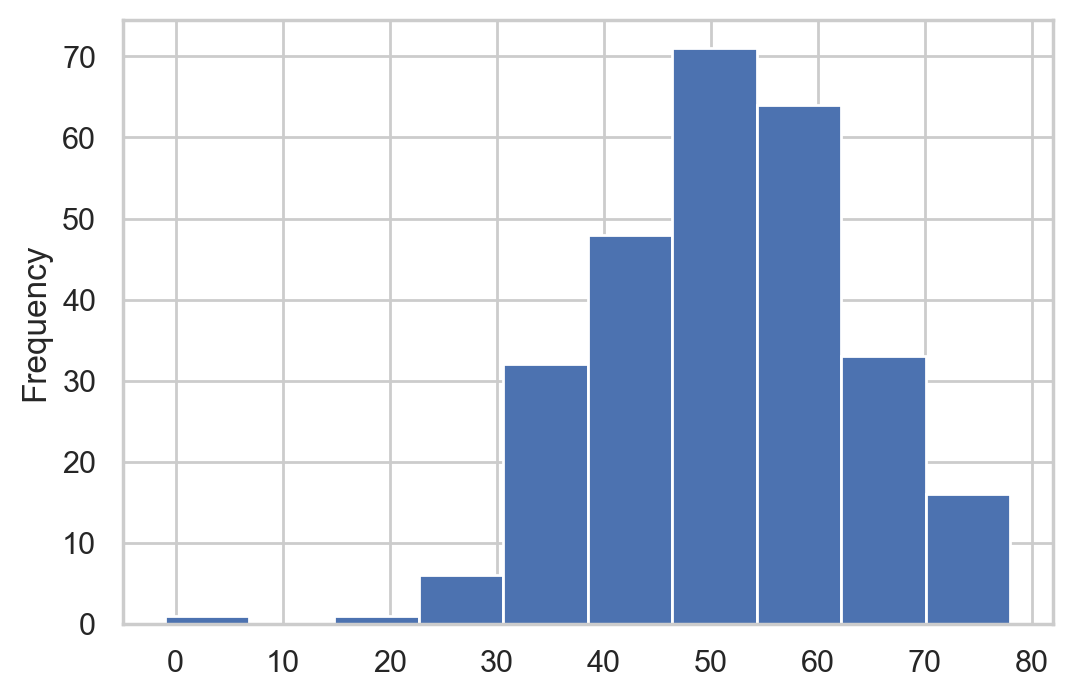

In [502]:
can_reps_with_age.new_age.plot.hist()

In [503]:
can_reps_with_age.new_age.min()

-1.0

In [508]:
import numpy as np

can_reps_with_age.loc[127, 'age'] = np.NaN
can_reps_with_age.loc[127, 'new_age'] = np.NaN

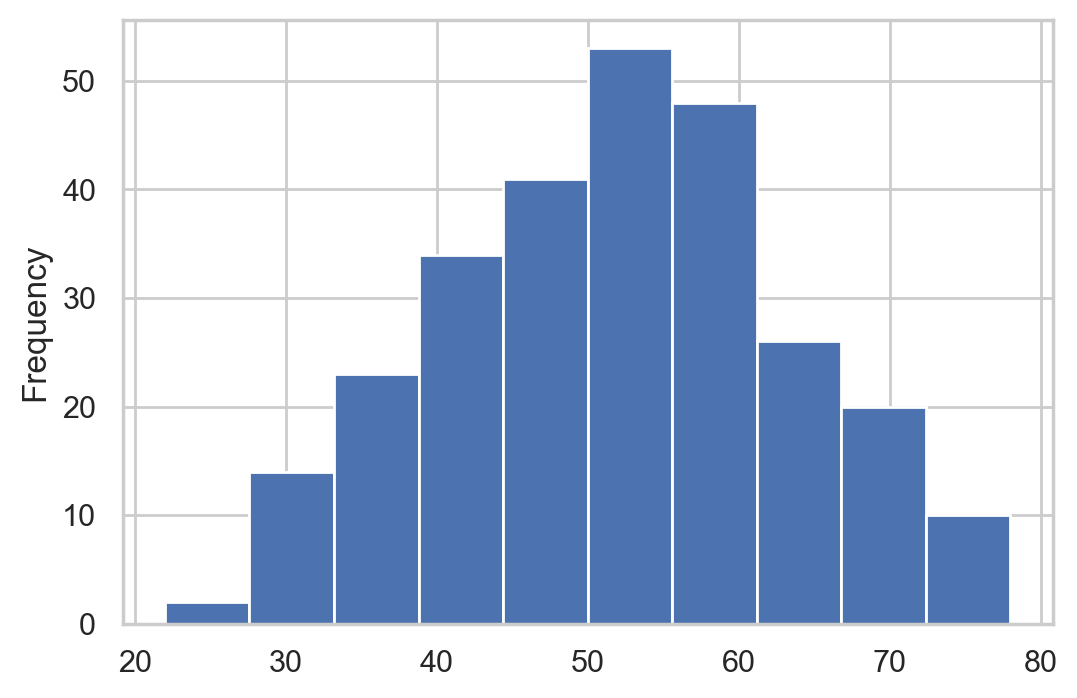

In [510]:
can_reps_with_age.new_age.plot.hist()

In [511]:
can_reps_with_age.new_age.min()

22.0

In [512]:
can_reps_with_age[can_reps_with_age.new_age == 22.0]

,District,Member,Member_link,Party - 1,Party - 1_link,Party - 2,Party - 2_link,age,new_age
161,,Eric Melillo,/wiki/Eric_Melillo,Conservative,NaN,Kenora,/wiki/Kenora_(electoral_district),22.0,22.0


In [513]:
def graph_age_histogram(df, title: str, age_col: str, y_axis_label='# Senators'):
    date_ranges = [(0, 40), (40, 50), (50, 60), (60, 70), (70, 100)]

    xs = ['under 40', '40 - 49', '50 - 59', '60 - 69', '70+']
    ys = []

    for x_label, (min_inc, max_excl) in zip(xs, date_ranges):
        num_senators = ((df[age_col] >= min_inc) & (df[age_col] < max_excl)).sum()
#         hist_rows.append({
#             'age_range': x_label,
#             'num_senators': num_senators,
#             'country': 'Canada'
#         })
        ys.append(num_senators)

    plt.bar(x=xs, height=ys)
    plt.title(title)
    plt.ylabel(y_axis_label)
    plt.xlabel('Age')
    plt.show()

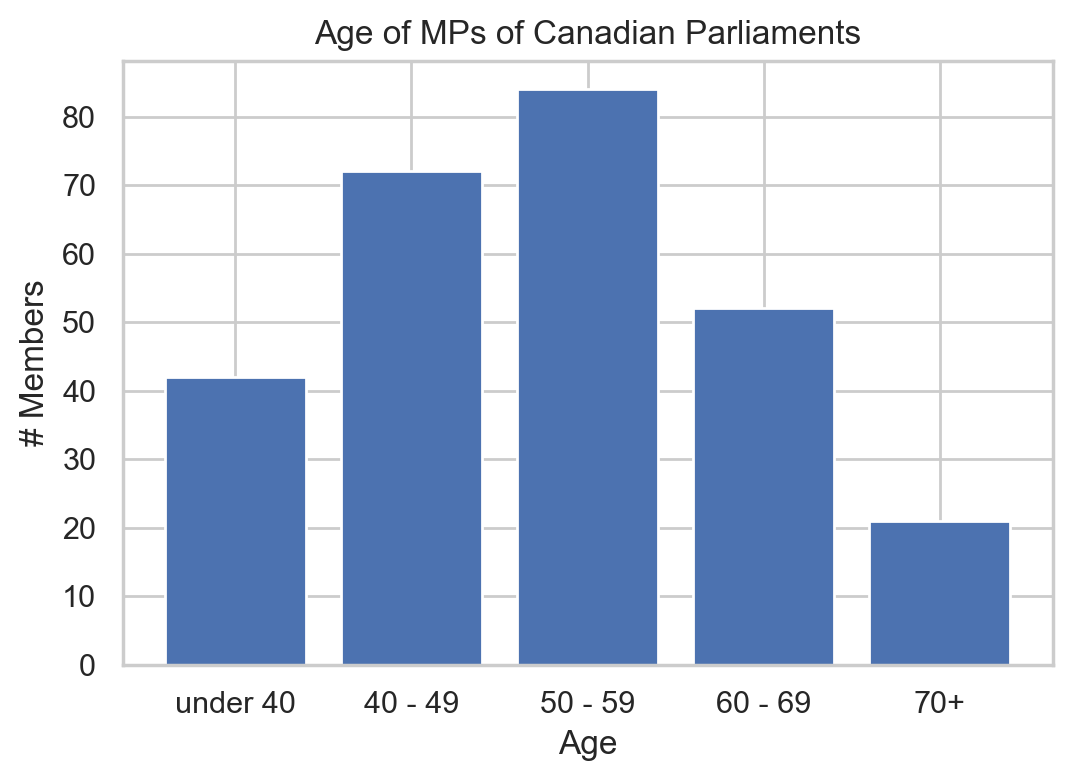

In [514]:
graph_age_histogram(can_reps_with_age, age_col='new_age', y_axis_label='# Members', title='Age of MPs of Canadian Parliaments')